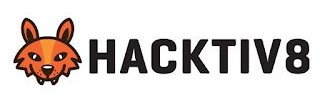

# Final Project 3 Ensemble - Random Foreset

# Tim - Project Kelompok 6



    Anggota :

    Ahmad Fadillah (PYTN-KS17-06)
    Felic Wicent (PYTN-KS17-025)
    Haniefa Aulia Rahma (PYTN-KS17-01)

    Instructor : Chamdan L Abdulbaaqiy
    Project : Ensemble - Random Foreset pada dataset Heart Failure Prediction
    Batch : 5


# A. Perkenalan

## A.1 Latar Belakang

Penyakit gagal jantung merupakan masalah serius dalam kesehatan yang sangat berdampak berbagai negara. Dengan dataset klinis yang digunakan dalam projek ini akan menjadi sumber informasi terkait kondisi kesehatan beberapa pasien yang memiliki potensi risiko terkena gagal jantung. Dataset ini membagi informasi antara pasien yang telah mengalami gagal jantung dan pasien yang tidak mengalami gagal jantung, tentunya merepresentasikan dua kelas yang dapat diprediksi. Data kali ini, tidak hanya mencakup paramater soal medis seperti usia, riwayat penyakit, dsb. Tetapi juga memberikan gambaran menyeluruh terkait faktor-faktor lain yang mungkin berperan dalam prediksi terkena gagal jantung.

Dengan menggunakan teknik Ensemble Model ini dapat menghasilkan prediksi yang akurat terkait kemungkinan potensi terkena gagal jantung pada pasien-pasien terkait. Melalui analisis yang mendalam agar dapat membangun sebuah model prediksi yang dapat memberikan wawasan yang mendalam tentang bagaimana variabel-variabel tertentu dapat mempengaruhi risiko gagal jantung pada setiap pasien. Sehingga, hasil prediksi ini dapat menjadi manfaat bagi praktisi kesehatan untuk mendeteksi risiko secara dini, memberikan perawatan yang lebih terfokus, dan memaksimalkan upaya pencegahan terkena gagal jantung.

Projek ini memiliki potensi besar untuk memberikan pemahaman terhadap gagal jantung, tidak hanya sebagai penyakit tetapi juga sebagai hasil interaksi berbagai faktor kesehatan pada setiap individu. Dengan pendekatan yang kuat terhadap data ini melalui teknik Ensemble Model melalui Random Forest, diharapkan dapat memberikan kontribusi yang signifikan dalam upaya pencegahan dan pengelolaan penyakit yang serius ini.

## A.2 Dataset

Dataset yang dipakai pada project ini diambil dari kaggle. Adapun dataset yang digunakan ialah dataset heart-failure-clinical-data (data klinis gagal jantung) yang memiliki atribut sebanyak 13 dengan entitas sebanyak 299. Dengan memanfaatkan atribut-atribut yang ada kami akan menggunakannya untuk mendapatkan hasil prediksi yang baik dengan menggunakan teknik ensemble model.

## A.3 Informasi Atribute Dataset

1. **age** : umur pasien
2. **anaemia** : apakah ada pengurangan haemoglobin
3. **creatinine_phosphokinase** : level enzim CPK dalam mcg/L
4. **diabetes** : apakah pasien punya riwayat diabetes
5. **ejection_fraction** : persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. **high_blood_pressure** : apakah pasien punya darah tinggi
7. **platelets** : jumlah platelet di darah dalam kiloplatelets/mL
8. **serum_creatinine** ; level serum creatinine di darah dalam mg/dL
9. **serum_sodium** : level serum sodium di darah dalam mEq/L
10. **sex** : apakah pasien pria atau wanita
11. **smoking** : apakah pasien merokok
12. **time** : waktu dalam hari untuk follow-up
13. **DEATH_EVENT** : apakah pasien sudah meninggal saat waktu follow-up

## A.4 Objectif

Adapun Objektif yang ingin di capai :
1. `Mengidentifikasi faktor-faktor yang mempengaruhi potensi gagal jantung.`
2. `Mengevaluasi model Ensemble untuk memastikan keakuratannya dalam memprediksi gagal jantung pada dataset yang ada.`

# B. Import Package

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy*")
warnings.filterwarnings("ignore", message="is_sparse is deprecated*")


In [2]:
import os
os.environ['PYTHONWARNINGS'] = 'ignore'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics

# C. Data Loading

In [4]:
# Membuka File dataset heart_failure_clinical_records_dataset dengan Pandas

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
pd.set_option('display.max_columns', None)
df.reset_index(drop=True)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
0    75.0        0                       582         0                 20  \
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex   
0                      1  265000.00               1.9           130    1  \
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [5]:
# Cek jumlah baris dan kolom

row, col = df.shape
cek_baris_kolom = pd.DataFrame({'Jumlah Baris': [row], 'Jumlah Kolom': [col]})
cek_baris_kolom

Jumlah Baris  Jumlah Kolom
0           299            13

# D. Data Cleaning

In [6]:
df.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
294  62.0        0                        61         1                 38  \
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex   
294                    1   155000.0               1.1           143    1  \
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [7]:
# Cek nunique value pada attribute

cek_nunique = df.nunique()
cek_nunique = cek_nunique.to_frame(name='Jumlah')
cek_nunique.reset_index(inplace=True)
cek_nunique.rename(columns={'index': 'Kolom'}, inplace=True)
cek_nunique

Kolom  Jumlah
0                        age      47
1                    anaemia       2
2   creatinine_phosphokinase     208
3                   diabetes       2
4          ejection_fraction      17
5        high_blood_pressure       2
6                  platelets     176
7           serum_creatinine      40
8               serum_sodium      27
9                        sex       2
10                   smoking       2
11                      time     148
12               DEATH_EVENT       2

In [8]:
# Cek jumlah Duplikat yang sama persis

df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []

In [9]:
# Rubah nama attribute time menjadi day
# Note : Time ini adalah jumlah hari Follow Up akan lebih mudah di pahami jika dirubah menjadi day

df = df.rename(columns={'time': 'day'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  day                       299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
# Cek sedikit anomali data dari attribute age

df.describe()

age     anaemia  creatinine_phosphokinase    diabetes   
count  299.000000  299.000000                299.000000  299.000000  \
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets   
count         299.000000           299.000000     299.000000  \
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking         day   
count         299.00000    299.000000  299.000000  299.00000  299.000000  \
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [11]:
# CeK Jumlah Missing Value pada masing-masing attribute

cek_missing_value = df.isna().sum().reset_index()
cek_missing_value.columns = ['Attribute', 'Jumlah Missing Value']
cek_missing_value

Attribute  Jumlah Missing Value
0                        age                     0
1                    anaemia                     0
2   creatinine_phosphokinase                     0
3                   diabetes                     0
4          ejection_fraction                     0
5        high_blood_pressure                     0
6                  platelets                     0
7           serum_creatinine                     0
8               serum_sodium                     0
9                        sex                     0
10                   smoking                     0
11                       day                     0
12               DEATH_EVENT                     0

# E. Data Exploration

## E.1 Measure Central of Tendency

In [12]:
# Measure Central of Tendency : Mean, Median, Modus
# Note : 50% ialah Median

MCT = df.describe().T

MCT.reset_index().rename(
    columns={'index': 'Attribute'})

Attribute  count           mean           std      min   
0                        age  299.0      60.833893     11.894809     40.0  \
1                    anaemia  299.0       0.431438      0.496107      0.0   
2   creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
3                   diabetes  299.0       0.418060      0.494067      0.0   
4          ejection_fraction  299.0      38.083612     11.834841     14.0   
5        high_blood_pressure  299.0       0.351171      0.478136      0.0   
6                  platelets  299.0  263358.029264  97804.236869  25100.0   
7           serum_creatinine  299.0       1.393880      1.034510      0.5   
8               serum_sodium  299.0     136.625418      4.412477    113.0   
9                        sex  299.0       0.648829      0.478136      0.0   
10                   smoking  299.0       0.321070      0.467670      0.0   
11                       day  299.0     130.260870     77.614208      4.0   
12               DEATH_EVENT  299.0       0.321070      0.467670      0.0   

         25%       50%       75%       max  
0       51.0      60.0      70.0      95.0  
1        0.0       0.0       1.0       1.0  
2      116.5     250.0     582.0    7861.0  
3        0.0       0.0       1.0       1.0  
4       30.0      38.0      45.0      80.0  
5        0.0       0.0       1.0       1.0  
6   212500.0  262000.0  303500.0  850000.0  
7        0.9       1.1       1.4       9.4  
8      134.0     137.0     140.0     148.0  
9        0.0       1.0       1.0       1.0  
10       0.0       0.0       1.0       1.0  
11      73.0     115.0     203.0     285.0  
12       0.0       0.0       1.0       1.0

## E.2 Measure of Spread/Dispersion dan Shape

In [13]:
# Measure of Spread/Dispersion : Range, Interquartile Range, Variance, Standard Deviation
# Measure of Shape : Skewness, Kurtosis
# Note : Range = Max - Min

# Variance
variance_df = df.select_dtypes(
    include=[np.number]).var(ddof=1).to_frame()
variance_df.rename(columns={0: 'Variance'}, inplace=True)

# Standard Deviation
std_deviation_df = df.select_dtypes(
    include=[np.number]).std(ddof=1).to_frame()
std_deviation_df.rename(columns={0: 'Standard Deviation'}, inplace=True)

# Skewness
skewness_df = df.select_dtypes(include=[np.number]).skew().to_frame()
skewness_df.rename(columns={0: 'Skewness'}, inplace=True)
skewness_df['Skewness Description'] = skewness_df['Skewness'].apply(
    lambda x: 'Distribusi Positif' if x > 0 else ('Distribusi Negatif' if x < 0 else 'Distribusi Simetrik'))

# Kurtosis
kurtosis_df = df.select_dtypes(include=[np.number]).kurtosis().to_frame()
kurtosis_df.rename(columns={0: 'Kurtosis'}, inplace=True)
kurtosis_df['Kurtosis Description'] = kurtosis_df['Kurtosis'].apply(
    lambda x: 'Leptokurtik' if x > 0 else ('Platykurtik' if x < 0 else 'Mesokurtik'))

# Percentiles
percentile_values = df.select_dtypes(
    include=[np.number]).quantile([0.25, 0.50, 0.75])
percentile_values.index = ['25%', '50%', '75%']
percentile_values = percentile_values.T
percentile_values['IQR'] = percentile_values['75%'] - percentile_values['25%']

# Ranges
range_df = df.describe().loc[['min', 'max']].T
range_df.rename(columns={'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

# Menggabungkan semua hasil
Measure_of_Spread = pd.concat([variance_df, std_deviation_df,
                              skewness_df, kurtosis_df, percentile_values, range_df], axis=1)

# Tampilkan hasilnya
Measure_of_Spread.reset_index().rename(columns={'index': 'Attribute'})

Attribute      Variance  Standard Deviation  Skewness   
0                        age  1.414865e+02           11.894809  0.423062  \
1                    anaemia  2.461224e-01            0.496107  0.278261   
2   creatinine_phosphokinase  9.414586e+05          970.287881  4.463110   
3                   diabetes  2.441023e-01            0.494067  0.333929   
4          ejection_fraction  1.400635e+02           11.834841  0.555383   
5        high_blood_pressure  2.286144e-01            0.478136  0.626732   
6                  platelets  9.565669e+09        97804.236869  1.462321   
7           serum_creatinine  1.070211e+00            1.034510  4.455996   
8               serum_sodium  1.946996e+01            4.412477 -1.048136   
9                        sex  2.286144e-01            0.478136 -0.626732   
10                   smoking  2.187156e-01            0.467670  0.770349   
11                       day  6.023965e+03           77.614208  0.127803   
12               DEATH_EVENT  2.187156e-01            0.467670  0.770349   

   Skewness Description   Kurtosis Kurtosis Description       25%       50%   
0    Distribusi Positif  -0.184871          Platykurtik      51.0      60.0  \
1    Distribusi Positif  -1.935563          Platykurtik       0.0       0.0   
2    Distribusi Positif  25.149046          Leptokurtik     116.5     250.0   
3    Distribusi Positif  -1.901254          Platykurtik       0.0       0.0   
4    Distribusi Positif   0.041409          Leptokurtik      30.0      38.0   
5    Distribusi Positif  -1.618076          Platykurtik       0.0       0.0   
6    Distribusi Positif   6.209255          Leptokurtik  212500.0  262000.0   
7    Distribusi Positif  25.828239          Leptokurtik       0.9       1.1   
8    Distribusi Negatif   4.119712          Leptokurtik     134.0     137.0   
9    Distribusi Negatif  -1.618076          Platykurtik       0.0       1.0   
10   Distribusi Positif  -1.416080          Platykurtik       0.0       0.0   
11   Distribusi Positif  -1.212048          Platykurtik      73.0     115.0   
12   Distribusi Positif  -1.416080          Platykurtik       0.0       0.0   

         75%      IQR  Minimum   Maximum  
0       70.0     19.0     40.0      95.0  
1        1.0      1.0      0.0       1.0  
2      582.0    465.5     23.0    7861.0  
3        1.0      1.0      0.0       1.0  
4       45.0     15.0     14.0      80.0  
5        1.0      1.0      0.0       1.0  
6   303500.0  91000.0  25100.0  850000.0  
7        1.4      0.5      0.5       9.4  
8      140.0      6.0    113.0     148.0  
9        1.0      1.0      0.0       1.0  
10       1.0      1.0      0.0       1.0  
11     203.0    130.0      4.0     285.0  
12       1.0      1.0      0.0       1.0

## E.3 Visualisasi Data

### E.3.1 Pesebaran data 

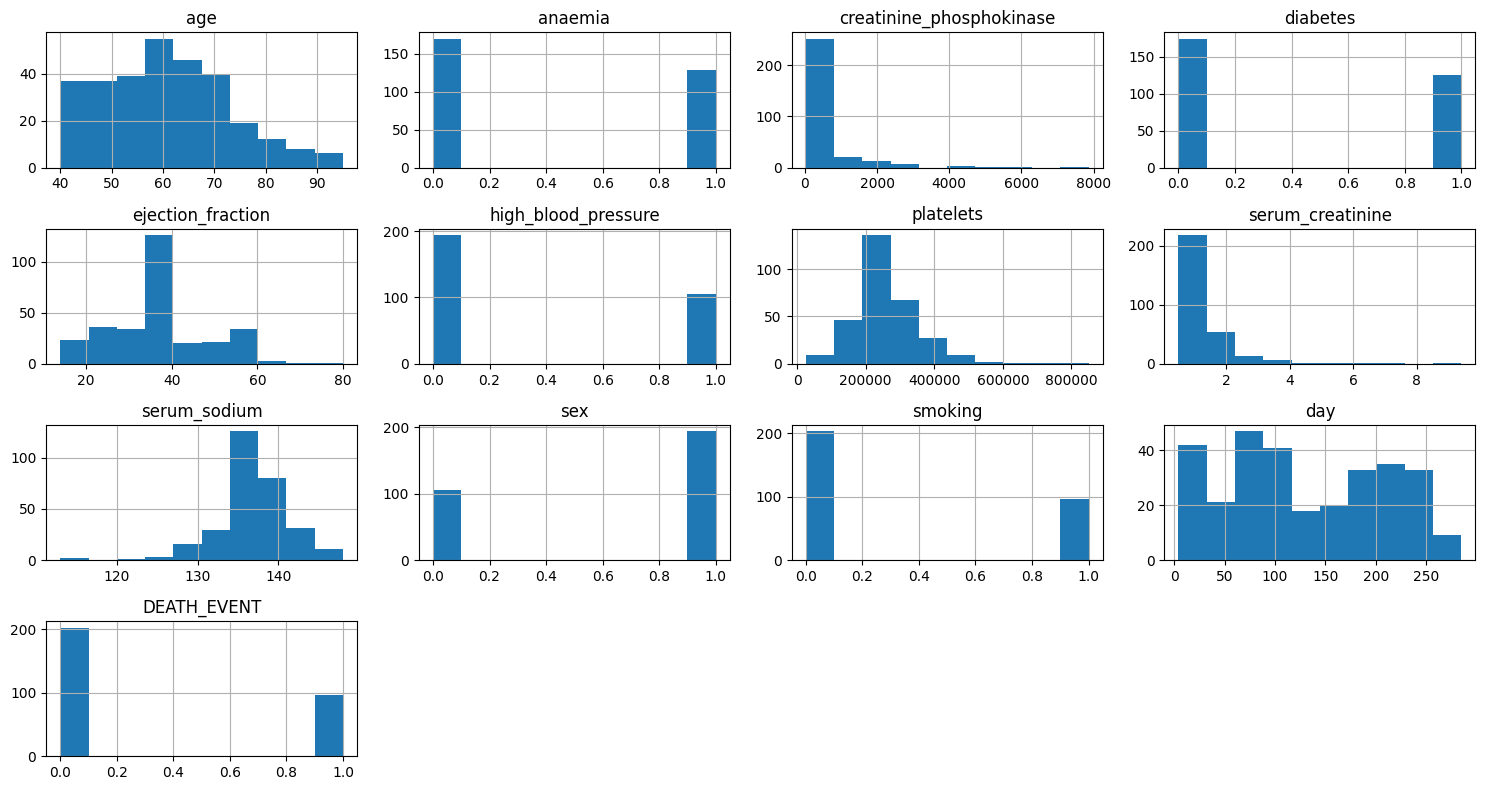

In [14]:
# Histogram

df.hist(figsize=(15, 8))
plt.title('Pesebaran Data')
plt.tight_layout()
plt.show()

Histogram diatas menggambarkan tentang distribusi nilai pada atribut numerik dalam dataset gagal jantung. Setiap histogramnya memvisualisasikan frekuensi kemunculan nilai-nilai dalam suatu atribut melalui sumbu horizontal menunjukkan rentang nilai atribut sedangkan sumbu vertikal menunjukkan jumlah frekuensi. Hal ini, dapat memberikan kami pemahaman mengenai bentuk distribusi, keberadaan outlier, serta pola data.

### E.3.2 Check Outlier dengan Boxplot

In [15]:
# Fungsi Untuk Visualisasi Boxplot dan Scatterplot

def Boxplot_Scatterplot(attribute, outliers):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    # Box Plot
    sns.boxplot(x=df[attribute], ax=axes[0])
    axes[0].set_ylabel('')
    axes[0].set_xlabel('')

    # Scatter Plot
    sns.scatterplot(x=df.index, y=df[attribute], ax=axes[1])
    sns.scatterplot(x=outliers.index,
                    y=outliers[attribute], color='red', ax=axes[1])
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].legend(['Bukan Outlier', 'Outlier'], bbox_to_anchor=(1.45, 1))

    fig.suptitle(f'Boxplot dan Scatterplot {attribute}', fontsize=20)
    plt.tight_layout()
    plt.show()


# Fungsi Untuk Pencarian Outlier

def Outliers(attribute):
    # Menghitung IQR
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas atas dan batas bawah untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mendeteksi outlier
    outliers = df[(df[attribute] < lower_bound) |
                  (df[attribute] > upper_bound)]

    # Memanggil fungsi Boxplot_Scatterplot
    Boxplot_Scatterplot(attribute, outliers)

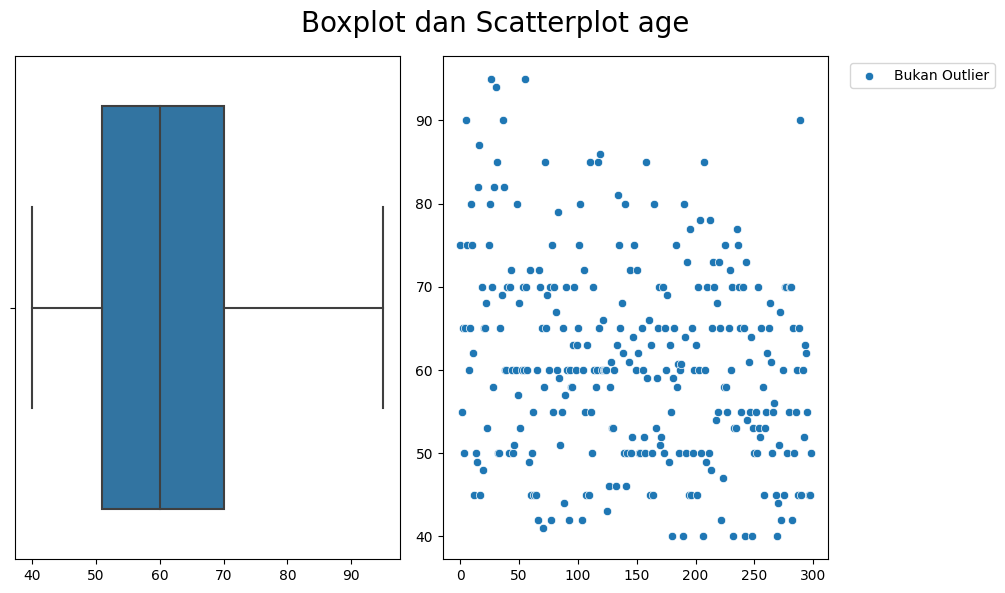

In [16]:
# Attribute age

Outliers('age')

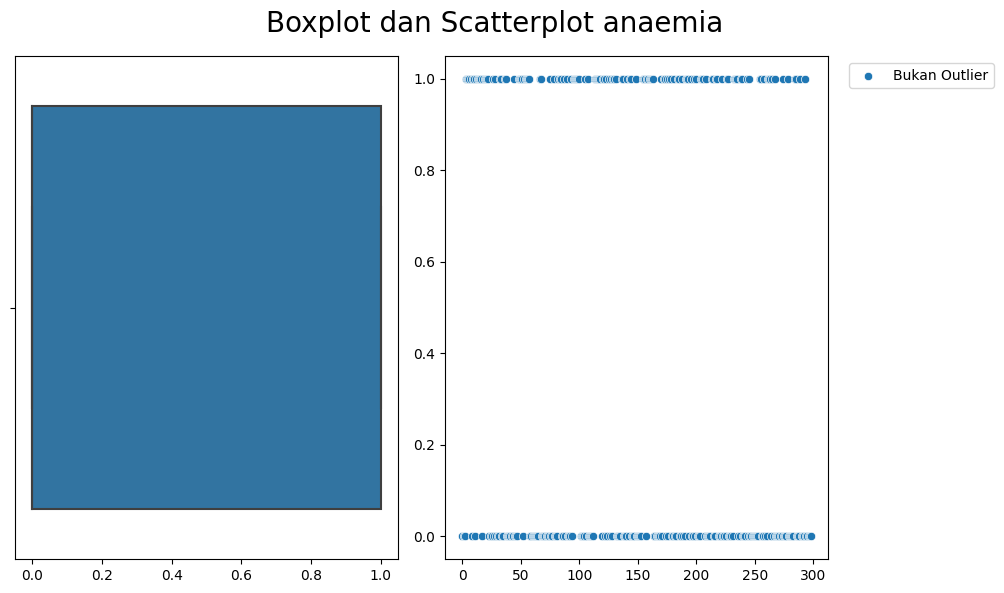

In [17]:
# Attribute anaemia

Outliers('anaemia')

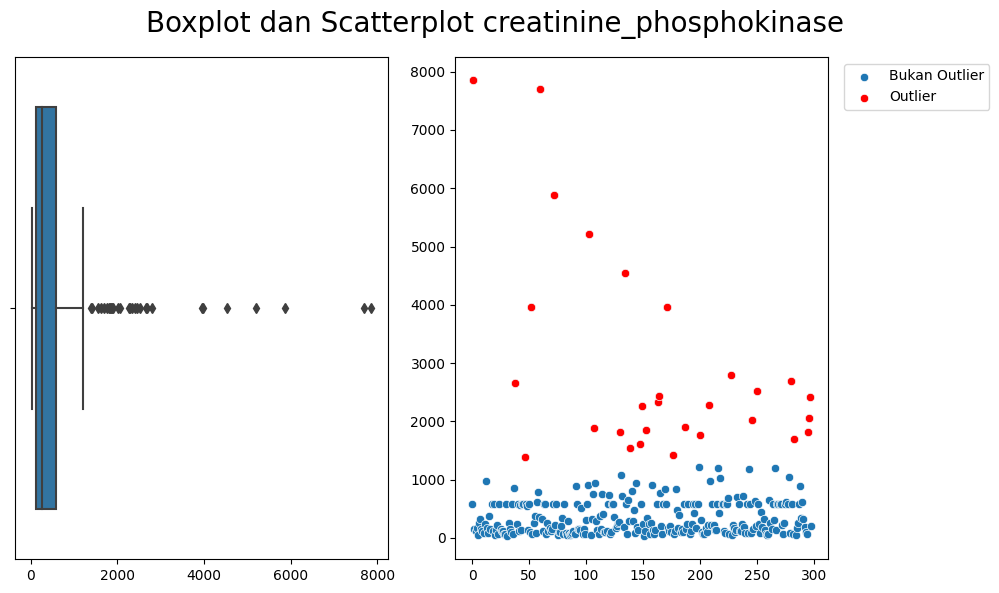

In [18]:
# Attribute creatinine_phosphokinase

Outliers('creatinine_phosphokinase')

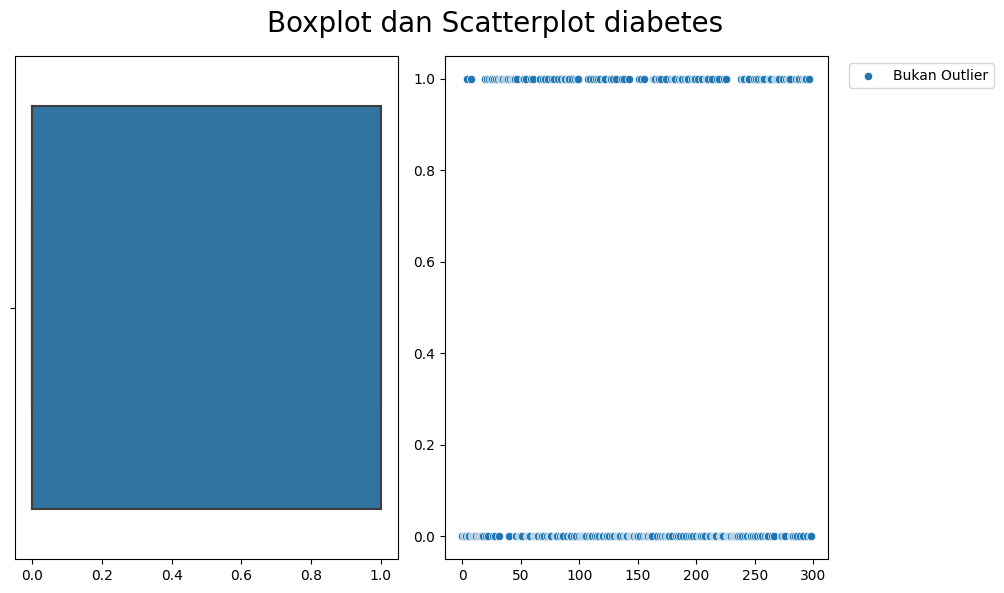

In [19]:
# Attribute diabetes

Outliers('diabetes')

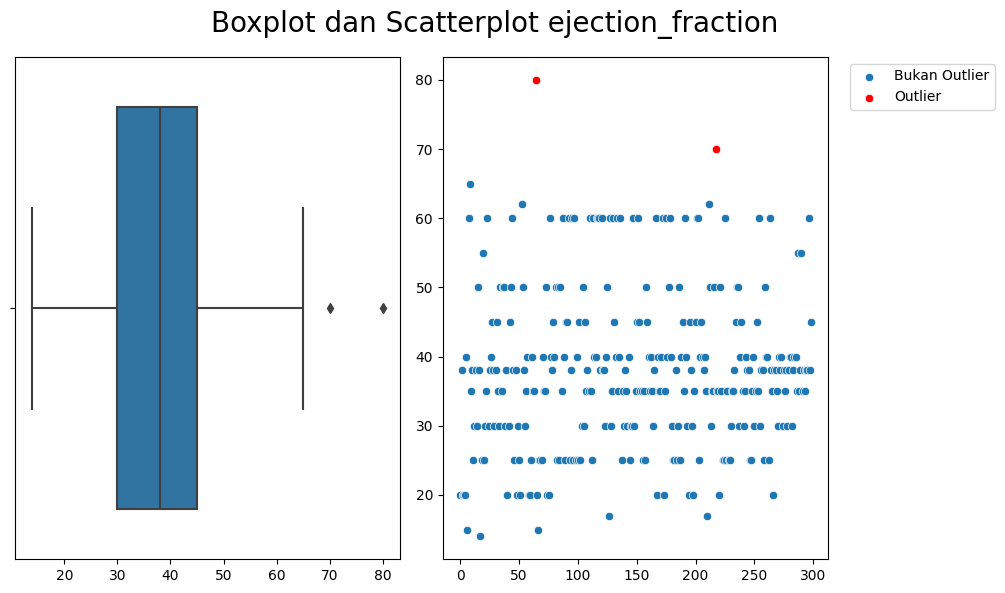

In [20]:
# Attribute ejection_fraction

Outliers('ejection_fraction')

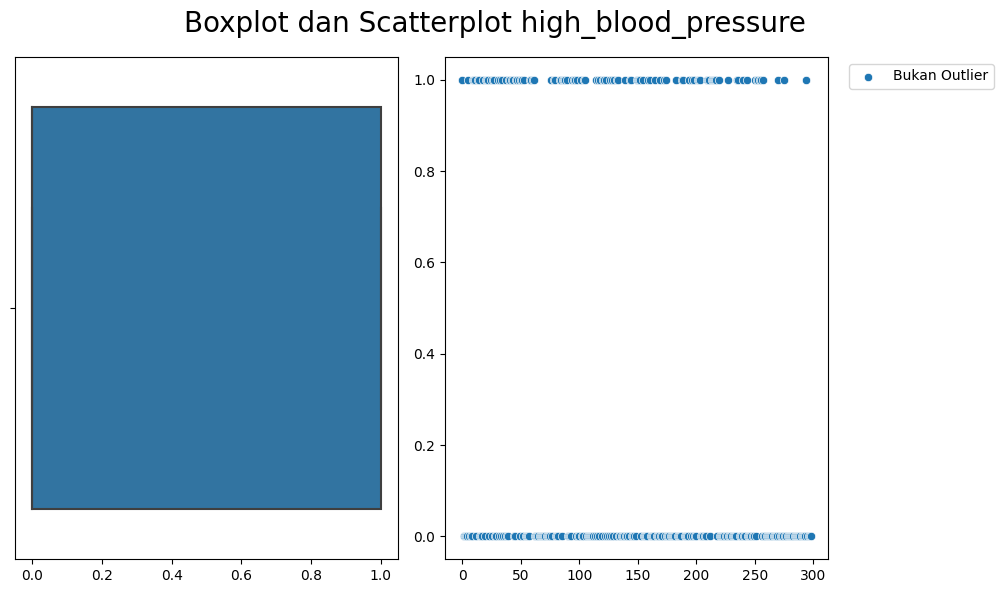

In [21]:
# Attribute high_blood_pressure

Outliers('high_blood_pressure')

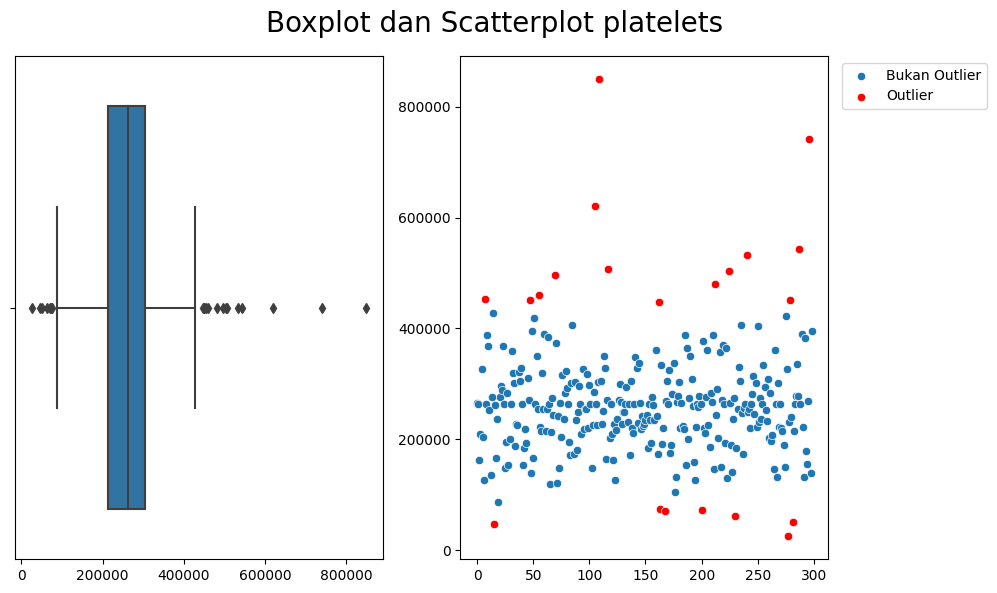

In [22]:
# Attribute platelets

Outliers('platelets')

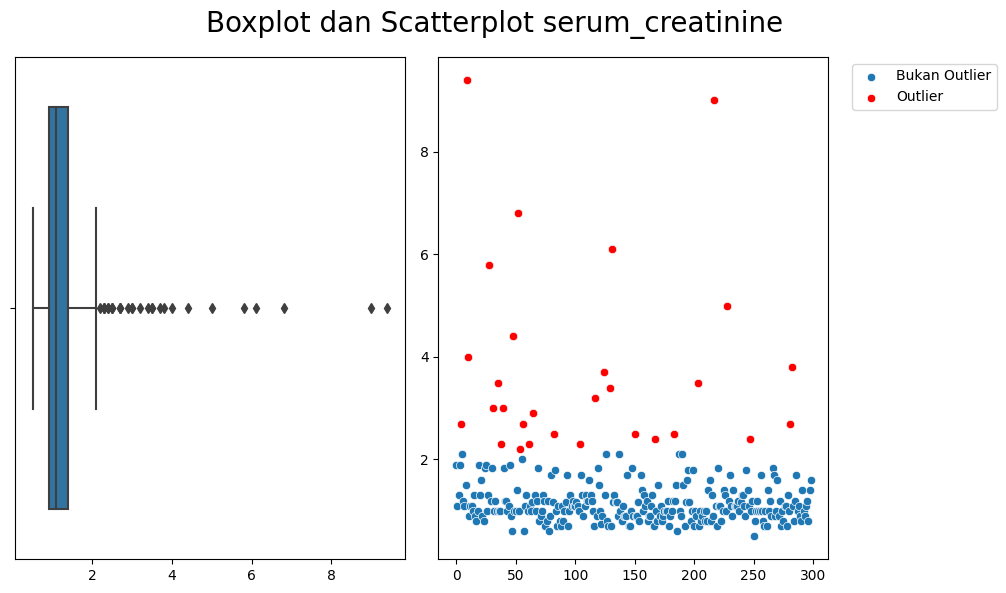

In [23]:
# Attribute serum_creatinine

Outliers('serum_creatinine')

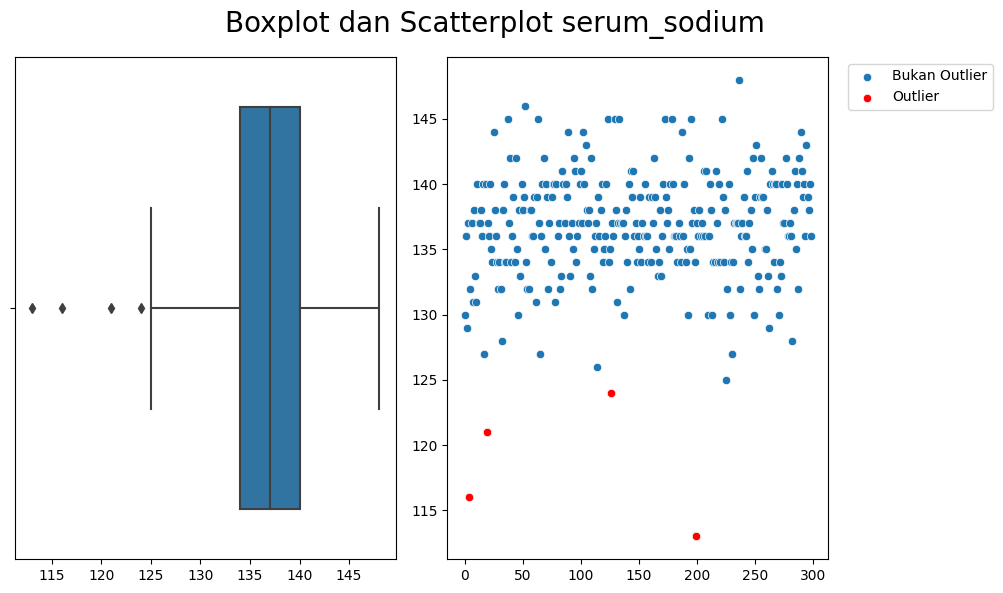

In [24]:
# Attribute serum_sodium

Outliers('serum_sodium')

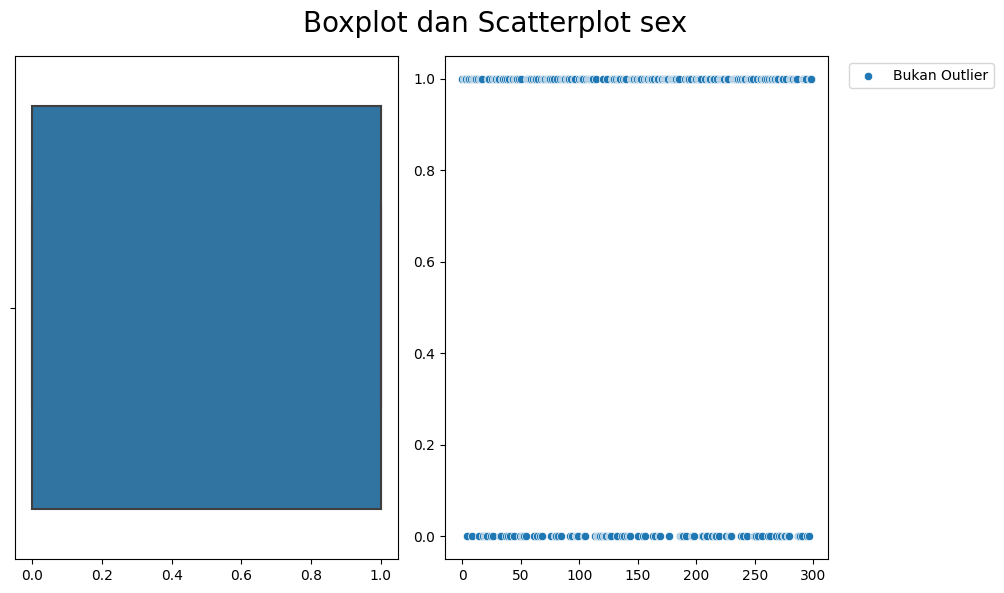

In [25]:
# Attribute sex

Outliers('sex')

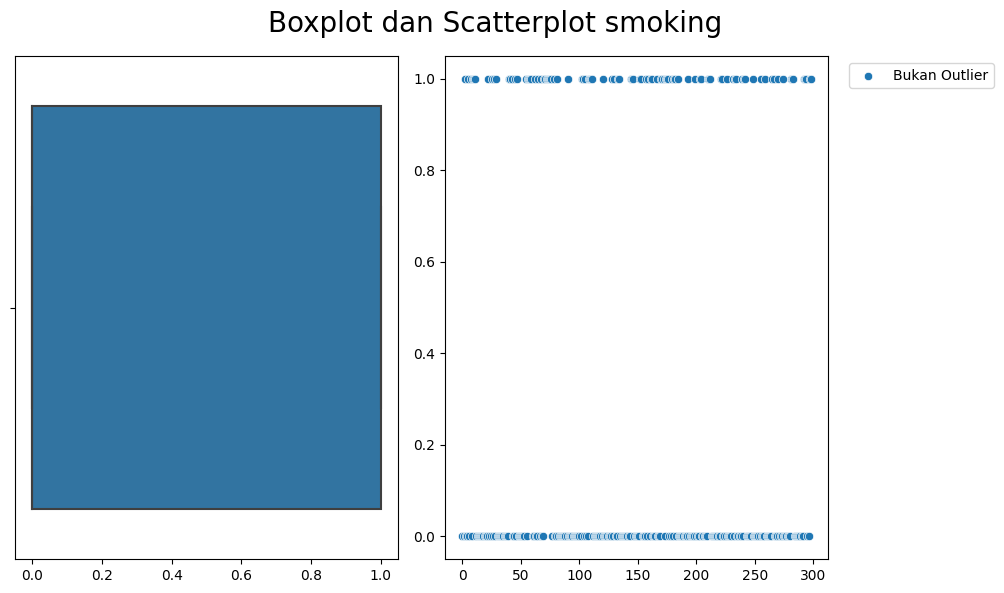

In [26]:
# Attribute smoking

Outliers('smoking')

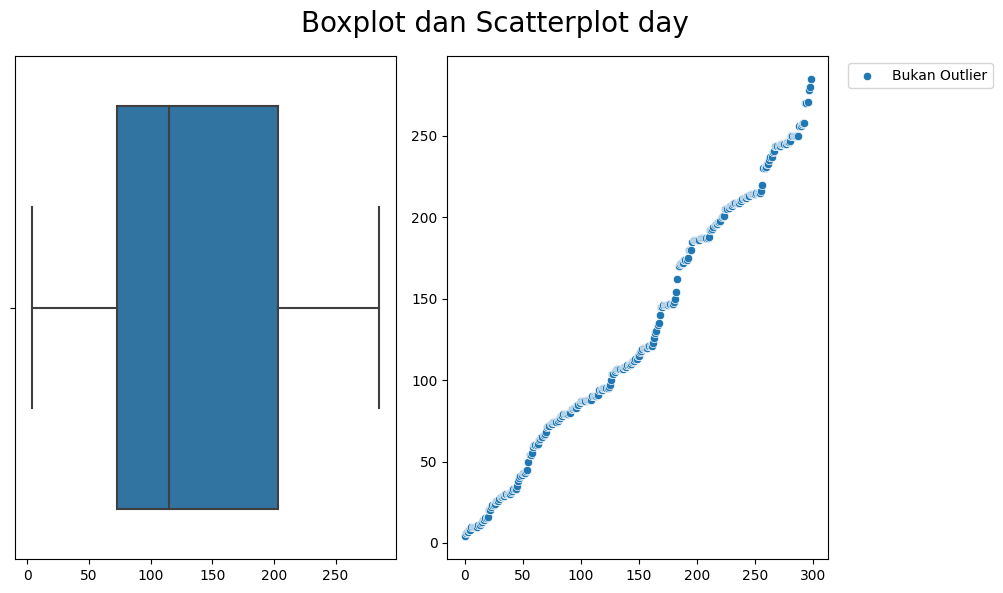

In [27]:
# Attribute day

Outliers('day')

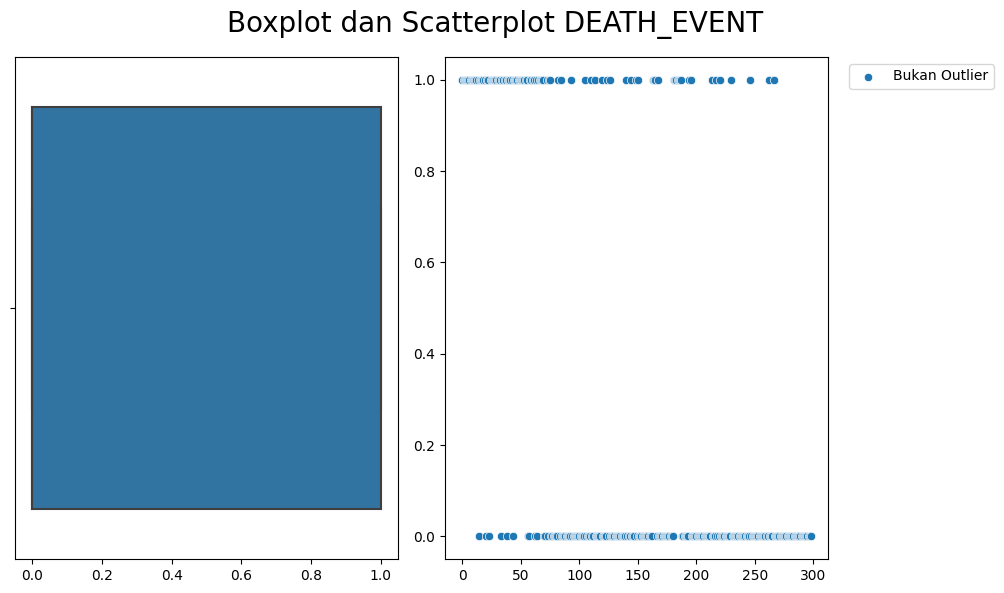

In [28]:
# Attribute DEATH_EVENT

Outliers('DEATH_EVENT')

Scatter plot diatas memberikan gambaran tentang hubungan antara setiap atribut dengan keberadaan outlier dalam dataset gagal jantung. Dengan sumbu X menunjukkan atribut dan sumbu Y mewakili nilai yang mungkin menunjukkan keberadaan outlier, plot ini memberikan gambaran tentang sebaran titik-titik data. Jika, terdapat titik-titik yang jauh dari pola umum, menandakan adanya outlier (titik merah) pada suatu kelompok tertentu di dalam atribut terkait. Namun, jika titik-titik berada dekat satu sama lain bisa jadi menandakan bahwa pada kelompok tertentu terdapat konsistensi atau kesamaan pada atribut terkait atau yang sedang diamati. Dengan ini, kami dapat mengidentifikasi potensi outlier berdasarkan atribut-atribut yang tersedia dan dapat memberikan kami pemahaman lebih lanjut terhadap pola yang mungkin terdapat pada kelompok atribut tertentu dalam kaitannya dengan kondisi gagal jantung.

### E.3.3 Violin plot

In [29]:
# Fungsi untuk membuat violin plot

def Violin_Plot(attribute):
    sns.violinplot(x=df['DEATH_EVENT'], y=df[attribute])

    # Menampilkan plot
    plt.title(f'Violin Plot DEATH_EVENT vs {attribute}')
    plt.xlabel('DEATH_EVENT')
    plt.ylabel(attribute)
    plt.show()

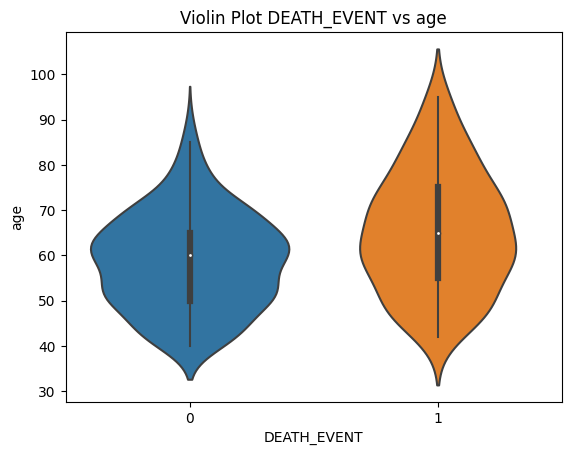

In [30]:
# Attribute age

Violin_Plot('age')

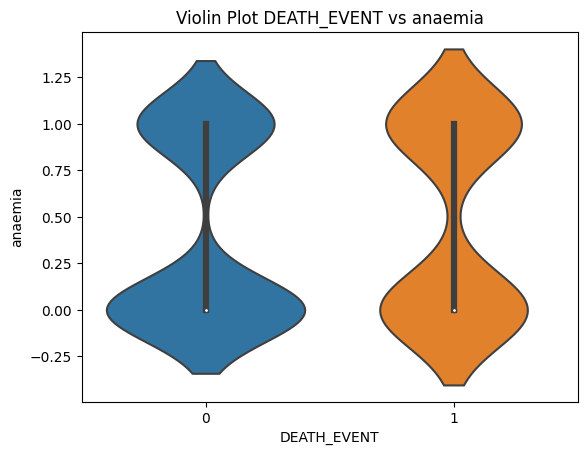

In [31]:
# Attribute anaemia

Violin_Plot('anaemia')

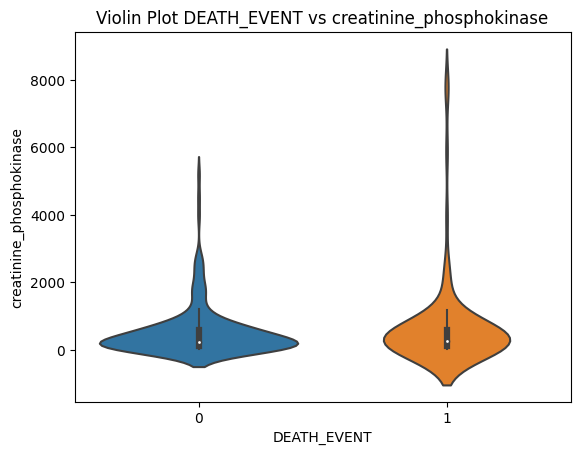

In [32]:
# Attribute creatinine_phosphokinase

Violin_Plot('creatinine_phosphokinase')

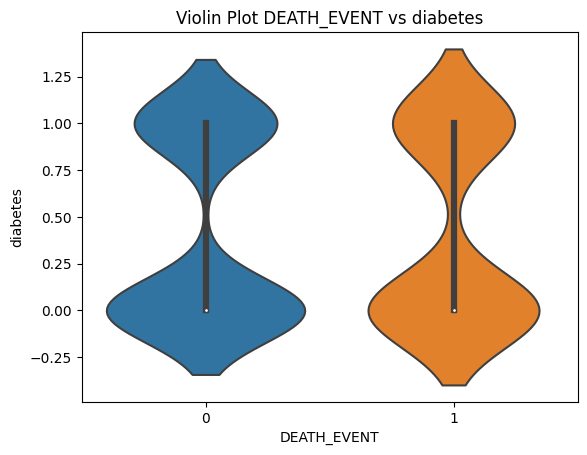

In [33]:
# Attribute diabetes

Violin_Plot('diabetes')

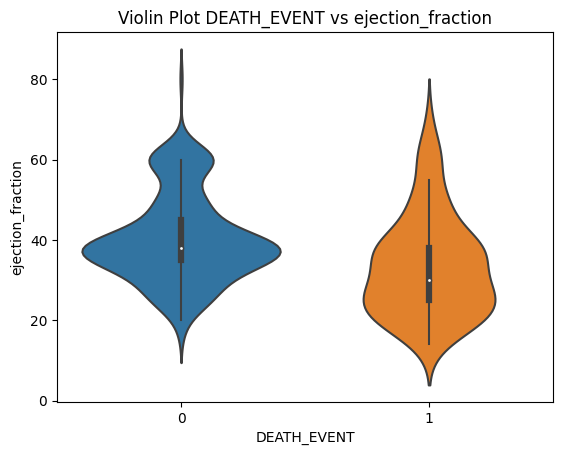

In [34]:
# Attribute ejection_fraction

Violin_Plot('ejection_fraction')

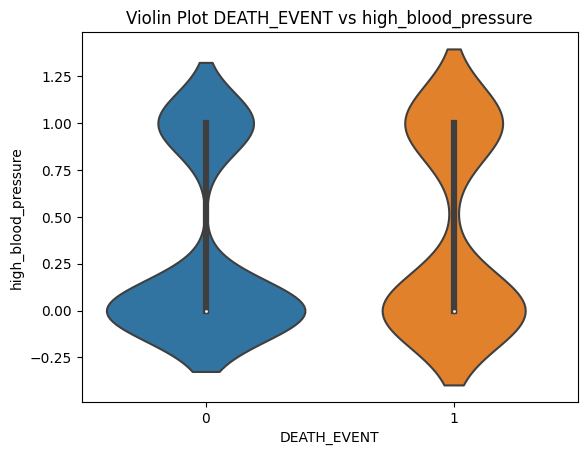

In [35]:
# Attribute high_blood_pressure

Violin_Plot('high_blood_pressure')

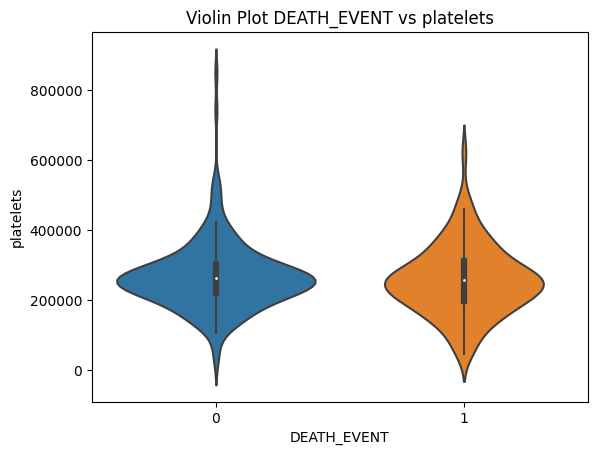

In [36]:
# Attribute platelets

Violin_Plot('platelets')

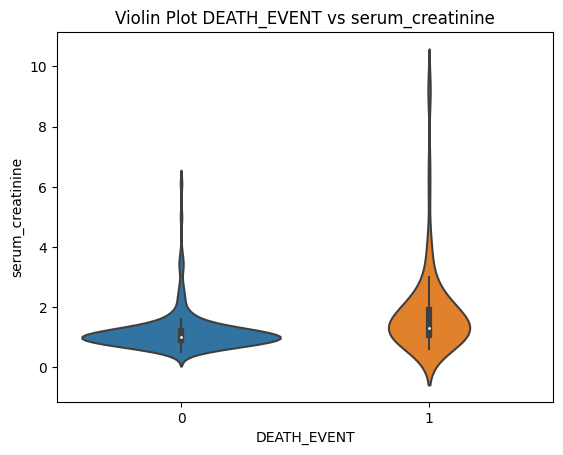

In [37]:
# Attribute serum_creatinine

Violin_Plot('serum_creatinine')

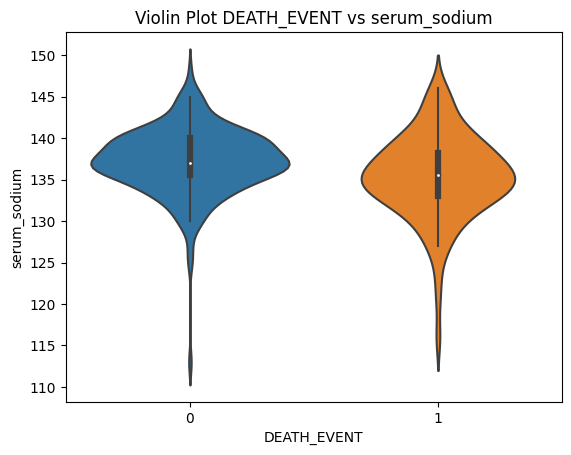

In [38]:
# Attribute serum_sodium

Violin_Plot('serum_sodium')

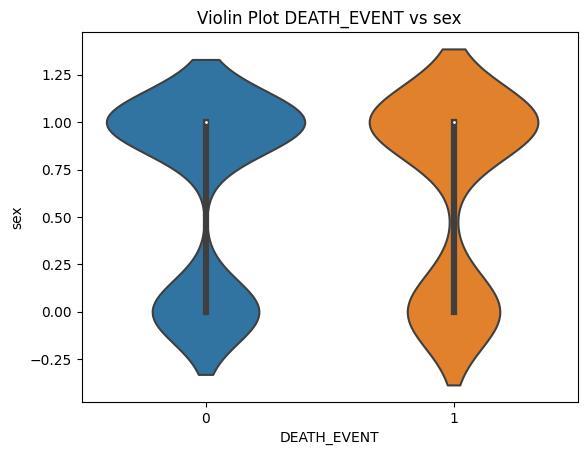

In [39]:
# Attribute sex

Violin_Plot('sex')

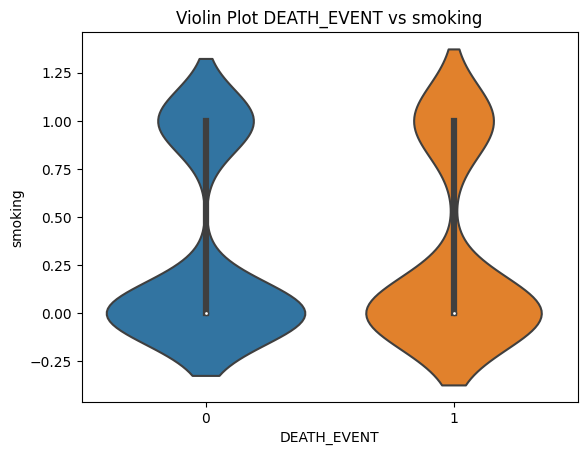

In [40]:
# Attribute smoking

Violin_Plot('smoking')

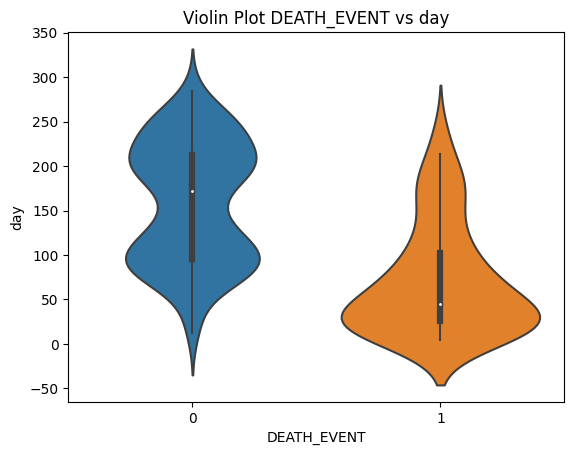

In [41]:
# Attribute day

Violin_Plot('day')

Violin plot diatas menggambarkan distribusi dari atribut-atribut pada dataset gagal jantung. Violin plot merupakan visualisasi yang menggabungkan informasi dari histogram dengan density plot. Bagian tengah violin plot merepresentasikan median atribut terkait, sementara lebar dan bentuk violin menunjukkan sebaran dan kepadatan data pada kelompok nilai tertentu dalam atribut terkait. Dengan ini, kami dapat melihat dengan jelas distribusi frekuensi kondisi atribut terkait terhadap pasien dalam dataset gagal jantung, mencakup informasi tentang kemungkinan keberadaan outlier, distribusi nilai-nilai yang lebih umum, serta kepadatan data pada kelompok nilai tertentu.

### E.3.4 Count Plot

In [42]:
# Fungsi untuk membuat count plot

def Count_Plot(attribute, target='DEATH_EVENT'):

    sns.countplot(y=attribute, hue=target, data=df)
    plt.title(f'Count Plot {target} vs {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('')
    plt.legend(title=target, bbox_to_anchor=(1.25, 1))
    plt.show()

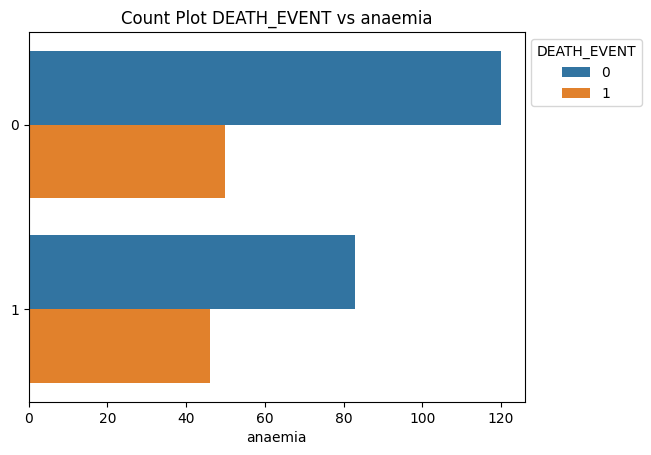

In [43]:
# Attribute age

Count_Plot('anaemia')

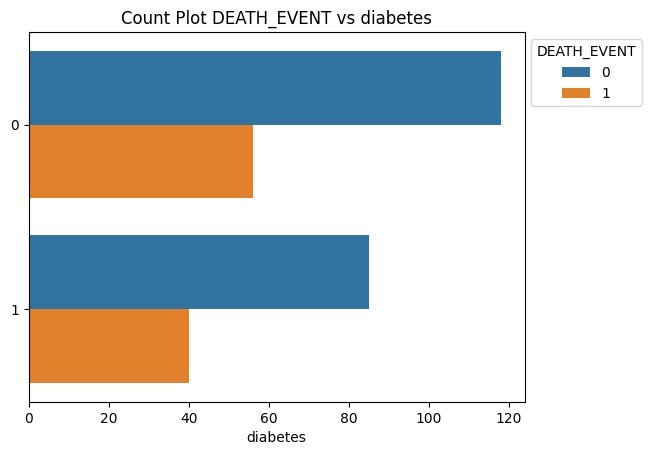

In [44]:
# Attribute diabetes

Count_Plot('diabetes')

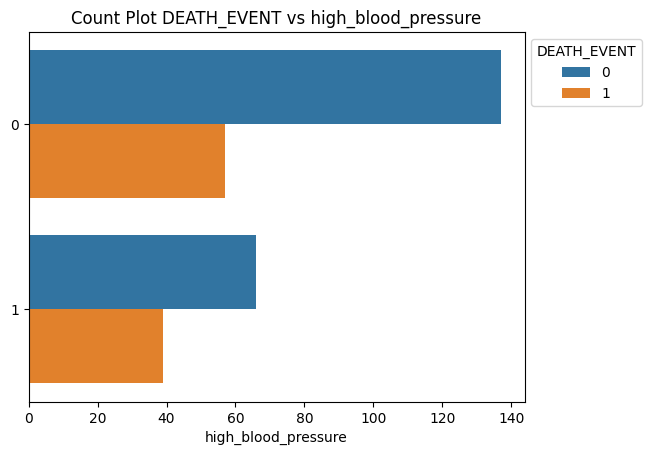

In [45]:
# Attribute high_blood_pressure

Count_Plot('high_blood_pressure')

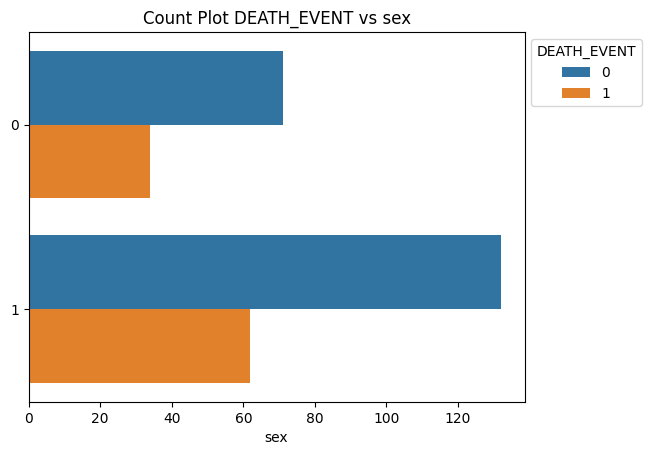

In [46]:
# Attribute sex

Count_Plot('sex')

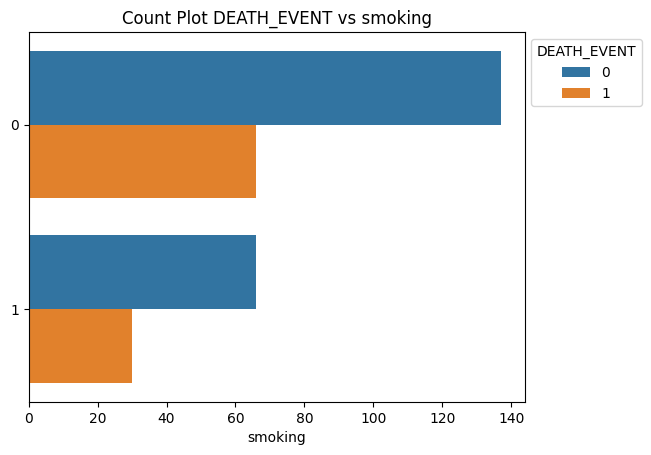

In [47]:
# Attribute smoking

Count_Plot('smoking')

Count plot diatas merupakan grafik yang menggambarkan jumlah kemunculan setiap kategori dalam atribut terkait. Grafik batang berperan untuk merepresentasikan jumlah pasien yang memiliki (nilai 1/orange) dan tidak memiliki (nilai 0/biru) kondisi yang terlibat dalam atribut di dataset gagal jantung. Misal, pada atribut 'anaemia' grafik menunjukkan +/- 30 pasien (nilai 1) mengalami pengurangan hemoglobin (anemia) sehingga ada potensi terkena gagal jantung dan sebanyak +/- 70 pasien (nilai 0) tidak memiliki kondisi anemia dalam dataset gagal jantung. Dengan demikian, count plot ini memberikan gambaran langsung tentang seberapa sering kondisi masalah tertentu muncul dalam atribut terkait yang sedang diamati.

### E.3.5 Pair Plot

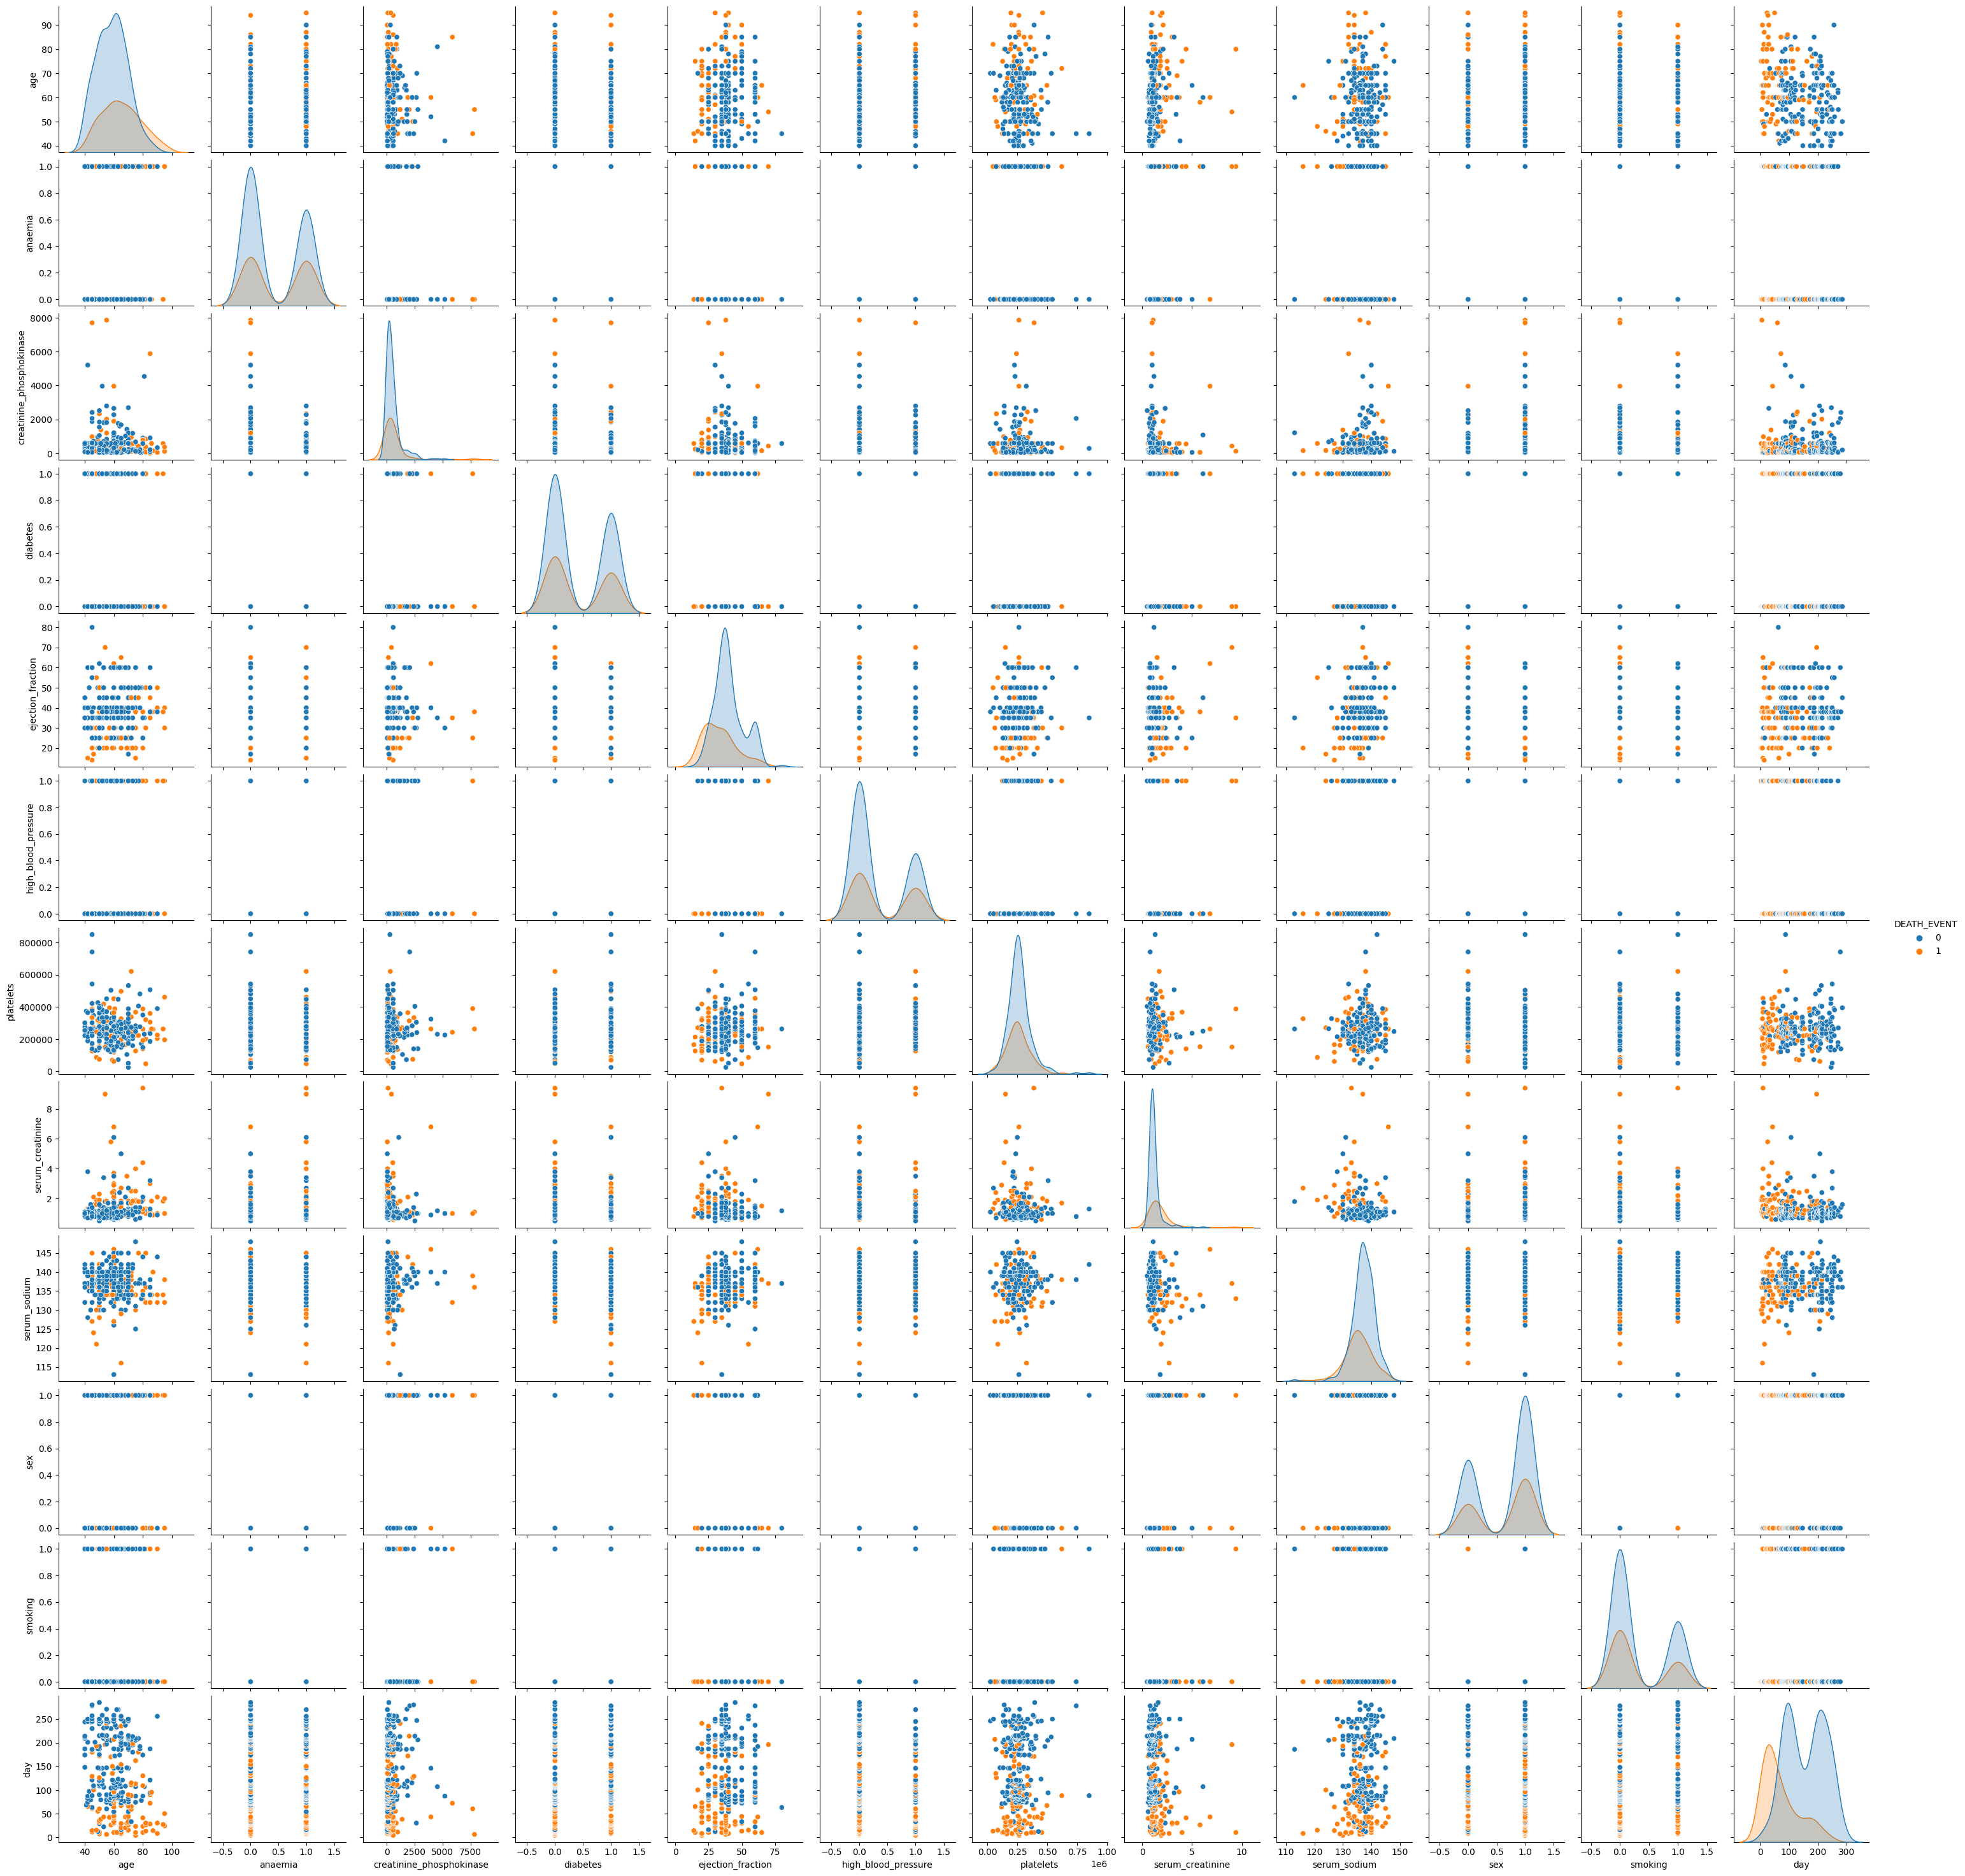

In [48]:
sns.pairplot(df, hue='DEATH_EVENT')

plt.show()

Pair plot diatas menggunakan seaborn (sns) untuk membuat matriks scatter plot dari beberapa atribut numerik dari dataset, dengan pemisah (hue) berdasarkan kolom 'DEATH_EVENT' atau status pasien (meninggal/hidup). Setiap baris matriks menampilkan scatter plot dari dua atribut numerik yang berbeda, sementara warna yang berbeda bertujuan untuk memudahkan kami dalam membedakan apakah terjadi kematian atau tidak. Dengan ini, dapat membantu kami melihat pola hubungan antar atribut secara keseluruhan, sekaligus membedakan bagaimana pola tersebut berkaitan dengan variabel target (DEATH_EVENT) dan membantu kami dalam melakukan penilaian awal tentang korelasi atau perbedaan antara variabel yang diamati dan target yang ingin diprediksi.

# F. Data Prepocessing

## F.1 Corelasi Attribut dengan Heatmap Correlation dan Covariance

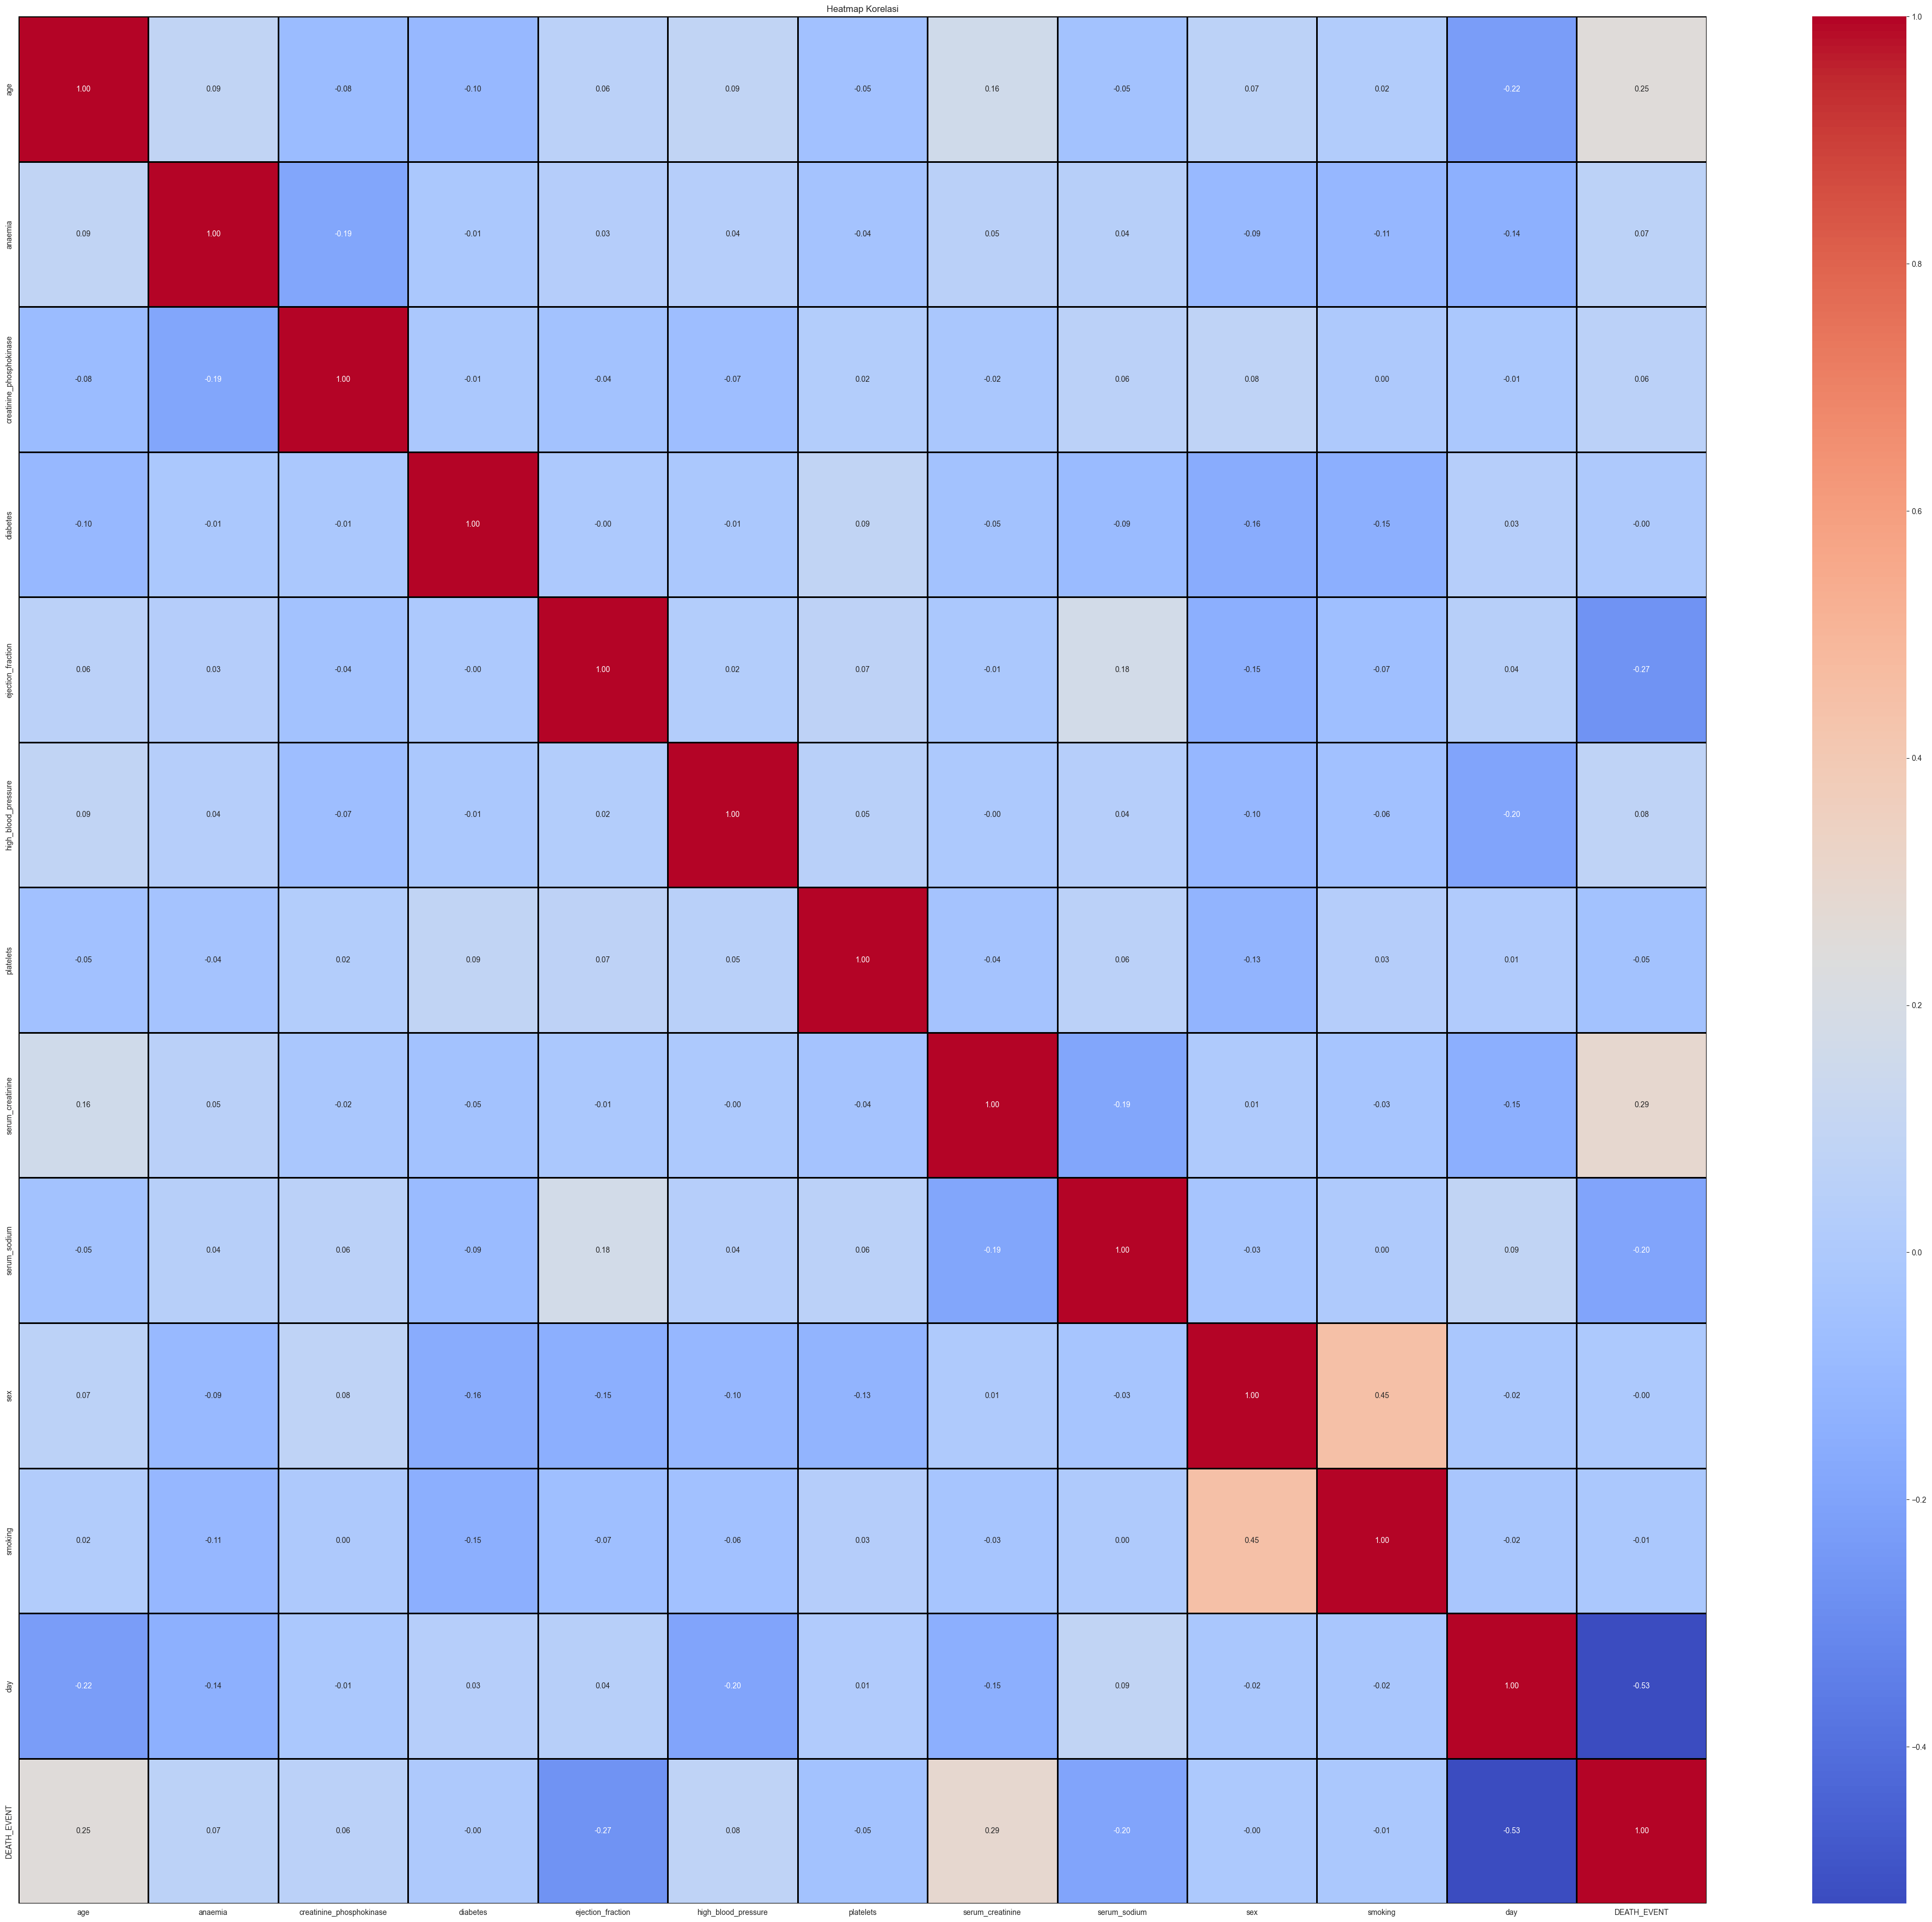

In [49]:
# Membuat Heatmap Correlation attribute

correlation_matrix = df.corr()

sns.set_style("whitegrid")

plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=1, linecolor='black')

plt.title("Heatmap Korelasi")
plt.show()

Heatmap diatas menggambarkan bagaimana matriks berkorelasi untuk mengukur hubungan antar atribut numerik dalam df_corr.
Warna yang digunakan menggambarkan tingkat korelasi, dan setiap sel diisi dengan nilai korelasi yang sesuai.
Menggunakan warna merah untuk korelasi positif dan biru untuk korelasi negatif. Semakin kuat korelasi, semakin intens warnanya.
Dengan begitu, dapat membantu kami memahami sejauh mana atribut saling berkaitan, membantu dalam pemilihan atribut dan perumusan hipotesis dalam analisis data.

Setiap sel pada heatmap berisi nilai korelasi antara dua variabel. Nilai korelasi berkisar antara -1 hingga 1, di mana:
- Nilai positif mendekati 1 menunjukkan korelasi positif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang sama.
- Nilai negatif mendekati -1 menunjukkan korelasi negatif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang berlawanan.
- Nilai mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi antara dua variabel.

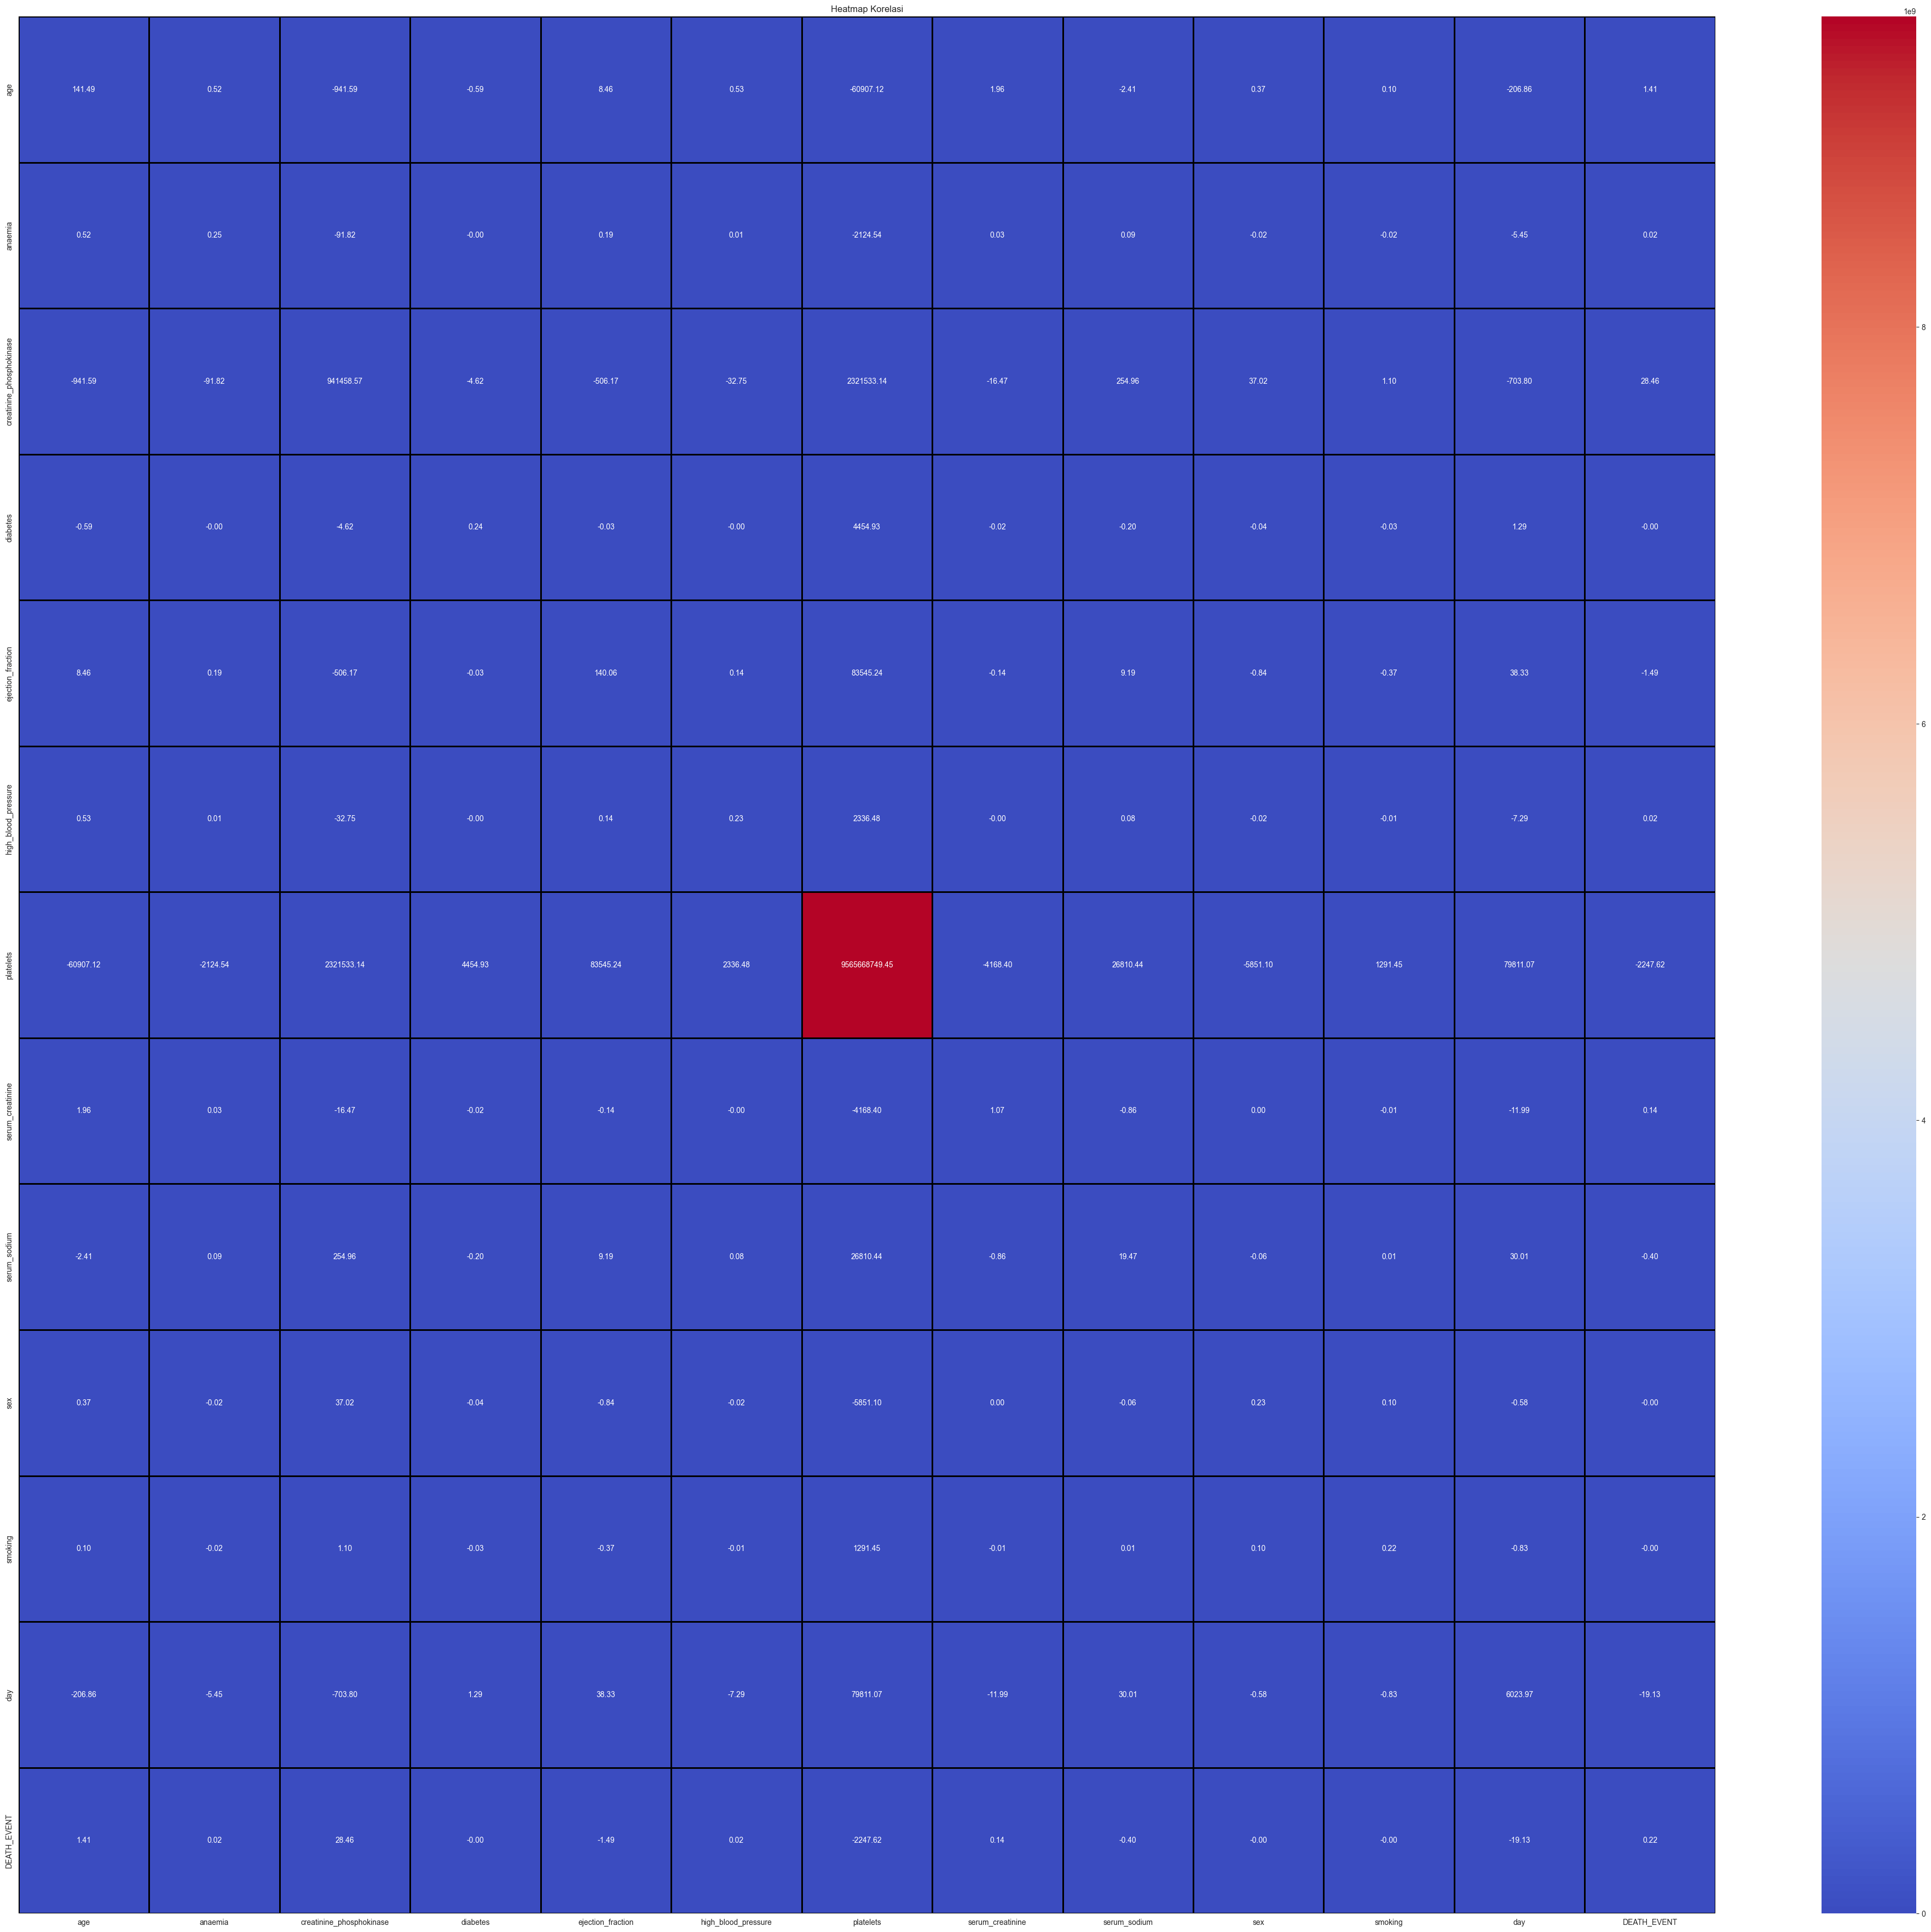

In [50]:
# Membuat Heatmap Covariance

correlation_matrix = df.cov()

sns.set_style("whitegrid")

plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=1, linecolor='black')

plt.title("Heatmap Korelasi")
plt.show()

Heatmap diatas berbeda dari heatmap sebelumnya, karena heatmap ini justru menunjukkan kovarian antara atribut-atribut numerik dalam df.cov, berdasarkan heatmap diatas menunjukkan atribut-atribut dengan warna biru yang dominan, maka hubungan antar atribut adalah cenderung negatif. Sementara nilai merah menunjukkan kovarian atribut terhadap dirinya sendiri (varians). Dengan ini, dapat memberikan kami pemahaman tentang hubungan linier antara atribut.

## F.2 Cardinality

In [51]:
attribute = df.columns
temp_attribute = []

for col in attribute:
    temp = len(df[col].unique())
    temp_attribute.append(temp)

data = {'Attribute': attribute, 'Jumlah Unique Value': temp_attribute}
temp_cardinality = pd.DataFrame(data)

temp_cardinality

Attribute  Jumlah Unique Value
0                        age                   47
1                    anaemia                    2
2   creatinine_phosphokinase                  208
3                   diabetes                    2
4          ejection_fraction                   17
5        high_blood_pressure                    2
6                  platelets                  176
7           serum_creatinine                   40
8               serum_sodium                   27
9                        sex                    2
10                   smoking                    2
11                       day                  148
12               DEATH_EVENT                    2

## F.3 Pembersihan Dataset dari Outlier

### F.3.1 Tanpa Cleaning Outlier : df_ori

In [52]:
df_ori = df.copy()

df_ori.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
294  62.0        0                        61         1                 38  \
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex   
294                    1   155000.0               1.1           143    1  \
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  day  DEATH_EVENT  
294        1  270            0  
295        0  271            0  
296        0  278            0  
297        1  280            0  
298        1  285            0

Dalam melakukan percobaan untuk sebuah parameter, kami memutuskan untuk mengabaikan outlier dengan pertimbangan, yaitu dikarenakan dataset hanya memiliki beberapa atribut saja yang dalam kategorinya dataset ini berskala kecil, sehingga apabila kami mencoba memperbaikinya maka menjadi tidak terlihat perbedaan antara parameternya. Lalu, kami menggunakan atribut-atribut untuk analisis dan pemodelan, sehingga membiarkan outlier akan menampilkan hasil analisis yang murni dan membantu kami menguji metode mana yang tepat.

### F.3.2 Cleaning Outlier Z-Score = -3 or 3 : df_z3

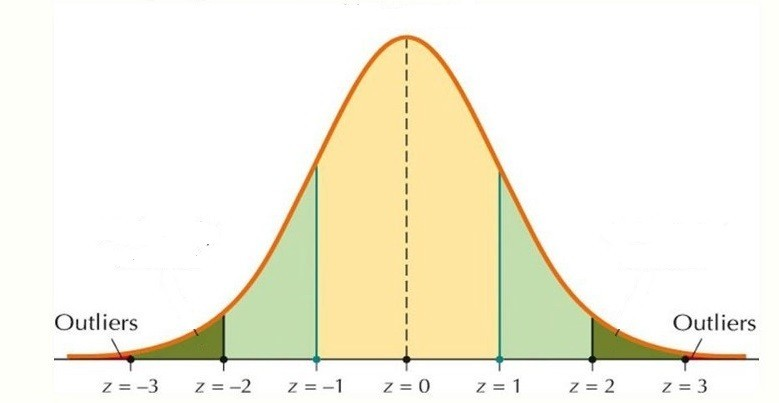

In [53]:
df_z3 = df.copy()

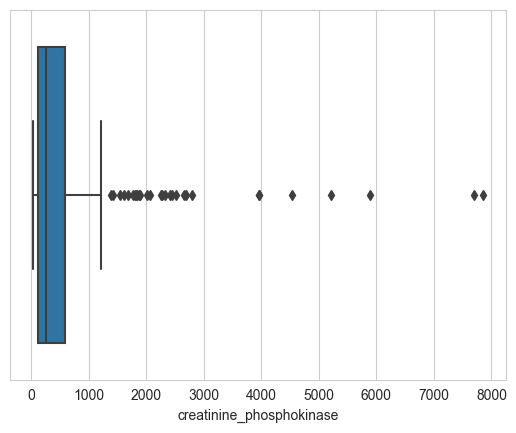

In [54]:
# Sebelum

sns.boxplot(x=df_z3['creatinine_phosphokinase'])
plt.show()

In [55]:
z_scores = np.abs(stats.zscore(df_z3))
outlier_mask = (z_scores > 3) | (z_scores < -3)
df_z3 = df_z3[~outlier_mask]
df_z3.dropna(inplace=True)

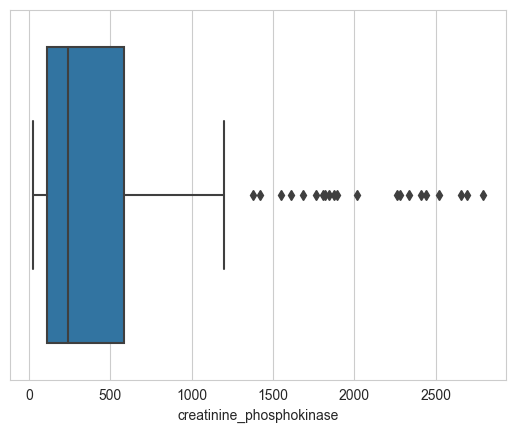

In [56]:
# Setelah

sns.boxplot(x=df_z3['creatinine_phosphokinase'])
plt.show()

Dalam melakukan pendekatan kami menggunakan metode Z-Score sebesar 3 untuk mengidentifikasi keberadaan outlier, berdasarkan visualisasi diatas terlihat bahwa jumlah outlier telah berkurang. Namun, masih ada nilai yang dianggap outlier meskipun sudah dilakukan pemrosesan. Dengan ini, perbaikan terhadap outlier tidak secara signifikan mempengaruhi perbedaan antar parameter yang kami amati. Lalu, kami menggunakan atribut-atribut dalam analisis dan pemodelan, sehingga dapat menghasilkan analisis yang lebih bersih dan membantu menentukan parameter yang paling sesuai untuk pembuatan model nantinya.

In [57]:
df_z3.reset_index(drop=True, inplace=True)
df_z3.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
275  63.0        1                     103.0         1               35.0  \
276  62.0        0                      61.0         1               38.0   
277  55.0        0                    1820.0         0               38.0   
278  45.0        0                    2413.0         0               38.0   
279  50.0        0                     196.0         0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex   
275                    0   179000.0               0.9         136.0    1  \
276                    1   155000.0               1.1         143.0    1   
277                    0   270000.0               1.2         139.0    0   
278                    0   140000.0               1.4         140.0    1   
279                    0   395000.0               1.6         136.0    1   

     smoking  day  DEATH_EVENT  
275        1  270            0  
276        1  270            0  
277        0  271            0  
278        1  280            0  
279        1  285            0

### F.3.3 Cleaning Outlier IQR : df_iqr

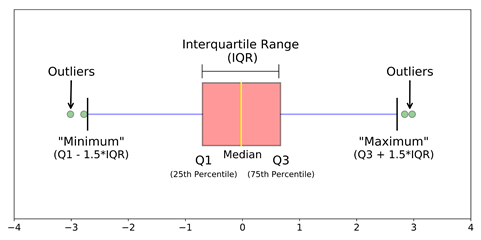

In [58]:
df_iqr = df.copy()

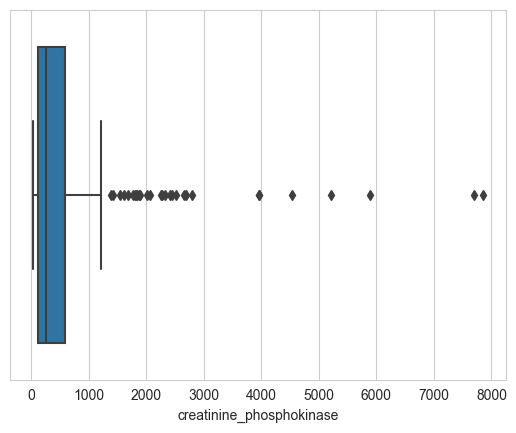

In [59]:
# Sebelum

sns.boxplot(x=df_iqr['creatinine_phosphokinase'])
plt.show()

In [60]:
def remove_outliers_iqr(column, k=1.5):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Menghapus outlier
    cleaned_data = column[(column >= lower_bound) & (column <= upper_bound)]

    return cleaned_data


for column in df_iqr.columns:
    df_iqr[column] = remove_outliers_iqr(df_iqr[column])

# Drop NaN values
df_iqr.dropna(inplace=True)

# Reset the index
df_iqr.reset_index(drop=True, inplace=True)

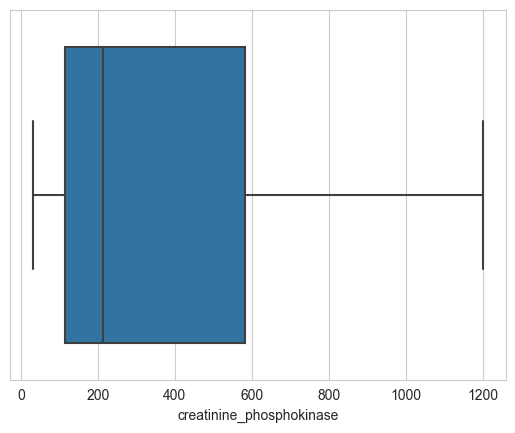

In [61]:
# Setelah

sns.boxplot(x=df_iqr['creatinine_phosphokinase'])
plt.show()

Dengan metode IQR telah memberikan hasil yang lebih efektif dalam membersihkan outlier secara menyeluruh dibandingkan dengan metode Z-Score. Penggunaan IQR mampu menghapus nilai-nilai ekstrem pada dataset dengan lebih baik. Dengan ini, dapat diartikan bahwa menggunakan IQR merupakan strategi yang lebih handal dalam mengatasi outlier dan memastikan bahwa data yang digunakan dalam analisis nantinya jauh lebih konsisten. Lalu, menurut kami IQR menjadi pilihan yang tepat untuk menghasilkan dataset yang lebih terpercaya untuk analisis nanti.

In [62]:
df_iqr.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
219  60.0        0                     320.0         0               35.0  \
220  52.0        0                     190.0         1               38.0   
221  63.0        1                     103.0         1               35.0   
222  62.0        0                      61.0         1               38.0   
223  50.0        0                     196.0         0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex   
219                    0   133000.0               1.4         139.0    1  \
220                    0   382000.0               1.0         140.0    1   
221                    0   179000.0               0.9         136.0    1   
222                    1   155000.0               1.1         143.0    1   
223                    0   395000.0               1.6         136.0    1   

     smoking  day  DEATH_EVENT  
219        0  258            0  
220        1  258            0  
221        1  270            0  
222        1  270            0  
223        1  285            0

## F.4 SMOTE()

### F.4.1 df_ori

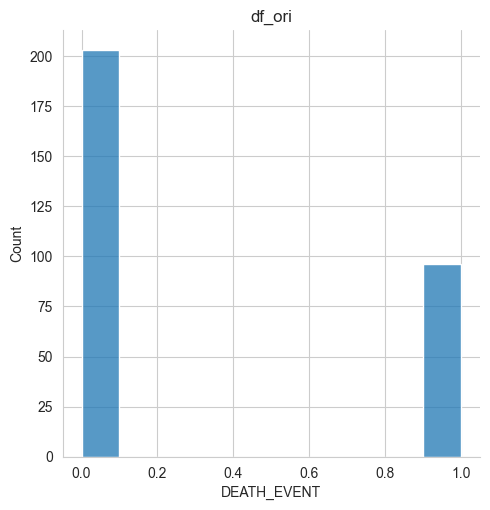

In [63]:
# Sebelum
sns.displot(df_ori['DEATH_EVENT'])
plt.title('df_ori')
plt.show()

In [64]:
x_ori = df_ori.drop('DEATH_EVENT', axis=1)
y_ori = df_ori['DEATH_EVENT']

smote = SMOTE(random_state=3)
x_resampled_ori, y_resampled_ori = smote.fit_resample(x_ori, y_ori)
print('Jumlah kelas sebelum SMOTE:', y_ori.value_counts())
print('\n\nJumlah kelas setelah SMOTE:', y_resampled_ori.value_counts())

Jumlah kelas sebelum SMOTE: DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


Jumlah kelas setelah SMOTE: DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


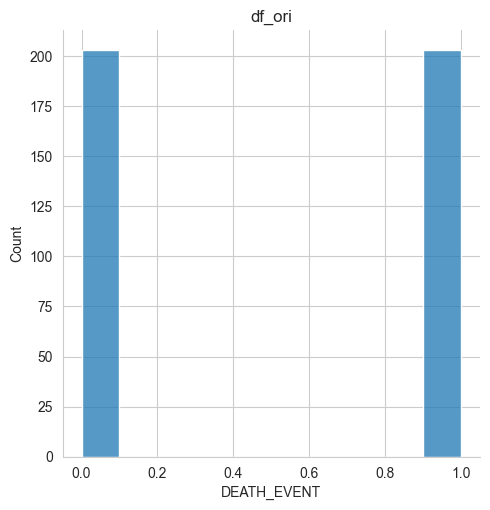

In [65]:
# Sesudah
sns.displot(y_resampled_ori)
plt.title('df_ori')
plt.show()

### F.4.2 df_z3

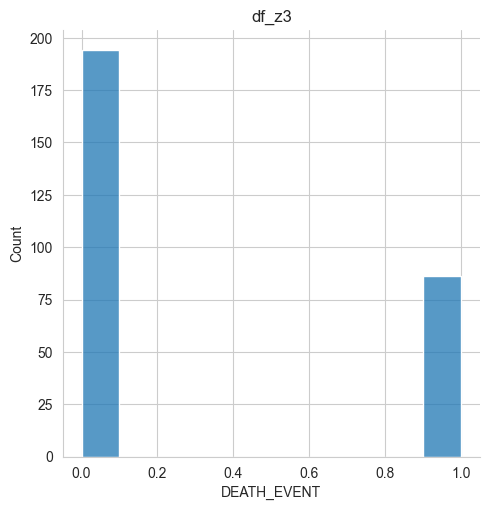

In [66]:
# Sebelum
sns.displot(df_z3['DEATH_EVENT'])
plt.title('df_z3')
plt.show()

In [67]:
x_z3 = df_z3.drop('DEATH_EVENT', axis=1)
y_z3 = df_z3['DEATH_EVENT']

smote = SMOTE(random_state=3)
x_resampled_z3, y_resampled_z3 = smote.fit_resample(x_z3, y_z3)
print('Jumlah kelas sebelum SMOTE:', y_z3.value_counts())
print('\n\nJumlah kelas setelah SMOTE:', y_resampled_z3.value_counts())

Jumlah kelas sebelum SMOTE: DEATH_EVENT
0    194
1     86
Name: count, dtype: int64


Jumlah kelas setelah SMOTE: DEATH_EVENT
1    194
0    194
Name: count, dtype: int64


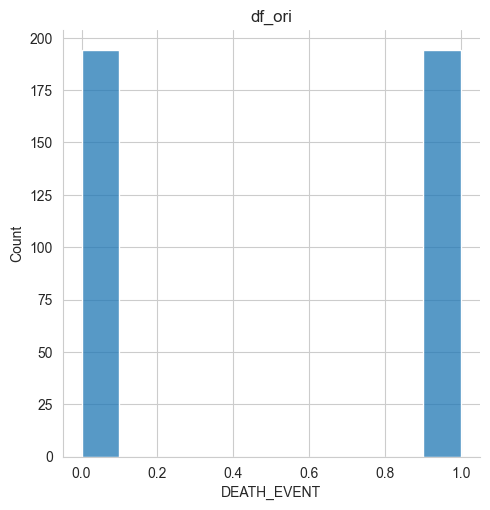

In [68]:
# Sesudah
sns.displot(y_resampled_z3)
plt.title('df_ori')
plt.show()

### F.4.3 df_iqr

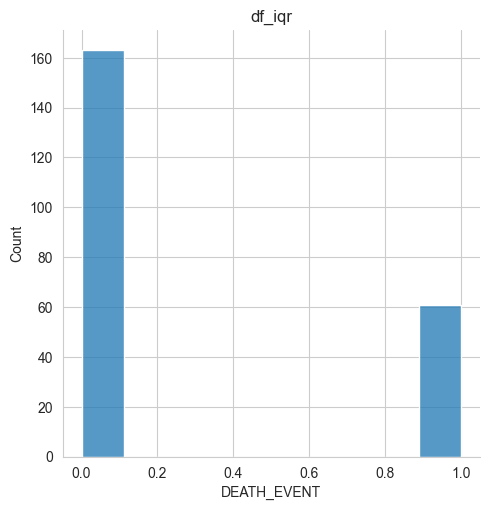

In [69]:
# Sebelum
sns.displot(df_iqr['DEATH_EVENT'])
plt.title('df_iqr')
plt.show()

In [70]:
x_iqr = df_iqr.drop('DEATH_EVENT', axis=1)
y_iqr = df_iqr['DEATH_EVENT']

smote = SMOTE(random_state=3)
x_resampled_iqr, y_resampled_iqr = smote.fit_resample(x_iqr, y_iqr)
print('Jumlah kelas sebelum SMOTE:', y_iqr.value_counts())
print('\n\nJumlah kelas setelah SMOTE:', y_resampled_iqr.value_counts())

Jumlah kelas sebelum SMOTE: DEATH_EVENT
0    163
1     61
Name: count, dtype: int64


Jumlah kelas setelah SMOTE: DEATH_EVENT
1    163
0    163
Name: count, dtype: int64


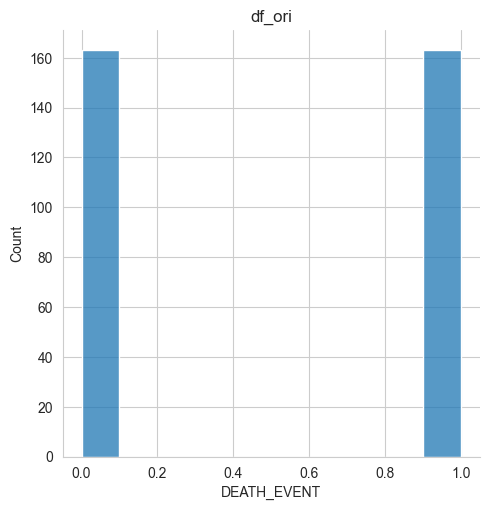

In [71]:
# Sesudah
sns.displot(y_resampled_iqr)
plt.title('df_ori')
plt.show()

Displot diatas menggambarkan distribusi dari variabel target 'y_train_' yang dapat membantu kami untuk melihat adanya keseimbangan atau ketidakseimbangan distribusi data dalam dataset sebelum penerapan teknik SMOTE. Jika terdapat data yang tidak seimbang, maka kemudian kami melakukan teknik SMOTE agar dapat menangani masalah ketidakseimbangan tersebut dengan menciptakan sampel sintetis pada atribut minoritas untuk mencapai keseimbangan yang lebih baik sehingga model yang didapat baik.

## F.5 train_test_split()

### F.5.1 df_ori

In [72]:
# Memisahkan fitur dan target
x_ori = x_resampled_ori
y_ori = y_resampled_ori

# Memisahkan data menjadi data latih 80%  dan data uji 20%
x_train_ori, x_test_ori, y_train_ori, y_test_ori = train_test_split(x_ori,
                                                                    y_ori,
                                                                    test_size=0.2,
                                                                    random_state=3)

### F.5.2 df_z3

In [73]:
# Memisahkan fitur dan target
x_z3 = x_resampled_z3
y_z3 = y_resampled_z3

# Memisahkan data menjadi data latih 80%  dan data uji 20%
x_train_z3, x_test_z3, y_train_z3, y_test_z3 = train_test_split(x_z3,
                                                                y_z3,
                                                                test_size=0.2,
                                                                random_state=3)

### F.5.3 df_iqr

In [74]:
# Memisahkan fitur dan target
x_iqr = x_resampled_iqr
y_iqr = y_resampled_iqr

# Memisahkan data menjadi data latih 80%  dan data uji 20%
x_train_iqr, x_test_iqr, y_train_iqr, y_test_iqr = train_test_split(x_iqr,
                                                                    y_iqr,
                                                                    test_size=0.2,
                                                                    random_state=3)

## F.6 StandardScaler()

### F.6.1 df_ori

In [75]:
# Standarisasi atribut prediktor (x_ori)

scaler = StandardScaler()
x_train_ori = scaler.fit_transform(x_train_ori)
x_test_ori = scaler.transform(x_test_ori)

In [76]:
print('x train (baris,kolom) : ', x_train_ori.shape)
print('x test  (baris,kolom) : ', x_test_ori.shape)
print('\ny train (baris,kolom) : ', y_train_ori.shape)
print('y test  (baris,kolom) : ', y_test_ori.shape)

x train (baris,kolom) :  (324, 12)
x test  (baris,kolom) :  (82, 12)

y train (baris,kolom) :  (324,)
y test  (baris,kolom) :  (82,)


### F.6.1 df_z3

In [77]:
# Standarisasi atribut prediktor (x_z3)

scaler = StandardScaler()
x_train_z3 = scaler.fit_transform(x_train_z3)
x_test_z3 = scaler.transform(x_test_z3)

In [78]:
print('x train (baris,kolom) : ', x_train_z3.shape)
print('x test  (baris,kolom) : ', x_test_z3.shape)
print('\ny train (baris,kolom) : ', y_train_z3.shape)
print('y test  (baris,kolom) : ', y_test_z3.shape)

x train (baris,kolom) :  (310, 12)
x test  (baris,kolom) :  (78, 12)

y train (baris,kolom) :  (310,)
y test  (baris,kolom) :  (78,)


### F.6.1 df_iqr

In [79]:
# Standarisasi atribut prediktor (x_iqr)

scaler = StandardScaler()
x_train_iqr = scaler.fit_transform(x_train_iqr)
x_test_iqr = scaler.transform(x_test_iqr)

In [80]:
print('x train (baris,kolom) : ', x_train_iqr.shape)
print('x test  (baris,kolom) : ', x_test_iqr.shape)
print('\ny train (baris,kolom) : ', y_train_iqr.shape)
print('y test  (baris,kolom) : ', y_test_iqr.shape)

x train (baris,kolom) :  (260, 12)
x test  (baris,kolom) :  (66, 12)

y train (baris,kolom) :  (260,)
y test  (baris,kolom) :  (66,)


# G. Model Definition & Training Model

## G.1 Random Forest dengan GridSearchCV

In [81]:
parameter_RF = {'n_estimators': [50, 100, 150],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 3],
                'max_features': ['sqrt', 'log2', None],
                'criterion': ['gini', 'entropy']}

### G.1.1 df_ori

In [82]:
# Sebelum Hyperparameter Tunning

df_ori_RF = RandomForestClassifier(random_state=1).fit(x_train_ori, y_train_ori)


print(f"Random Forest Accuracy df_ori pada x_test  : {np.round(((accuracy_score(y_test_ori,  df_ori_RF.predict(x_test_ori)))*100), decimals=2)}%")

Random Forest Accuracy df_ori pada x_test  : 91.46%


In [83]:
# Gunakan ini untuk pencarian Parameter Terbaik

# df_ori_RF_GSCV = GridSearchCV(  estimator = df_ori_RF, 
#                                 param_grid = parameter_RF, 
#                                 cv = 2, 
#                                 n_jobs = -1, 
#                                 verbose = 0).fit(x_train_ori, y_train_ori)
# df_ori_RF_GSCV

In [84]:
# Setelah didapat parameter terbaik

df_ori_RF_GSCV = RandomForestClassifier(criterion='entropy', 
                                        max_depth=None,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        max_features='sqrt',
                                        n_estimators=100,
                                        random_state=1).fit(x_train_ori, y_train_ori)

score_x_test_ori  = np.round(((accuracy_score(y_test_ori, df_ori_RF_GSCV.predict(x_test_ori)))*100), decimals=2)
print(f"Random Forest Accuracy df_ori pada x_test  : {score_x_test_ori}%")

Random Forest Accuracy df_ori pada x_test  : 92.68%


In [85]:
score_x_train_ori  = np.round(((accuracy_score(y_train_ori, df_ori_RF_GSCV.predict(x_train_ori)))*100), decimals=2)
print(f"Random Forest Accuracy df_ori pada x_train  : {score_x_train_ori}%")

Random Forest Accuracy df_ori pada x_train  : 100.0%


Sesuai dengan hasil pengujian diata, penggunaan GridSearchCV pada Random Forest Classifier untuk dataset df_ori memberikan gambaran bahwa parameter mempengaruhi performa model. Awalnya, model RF dilatih dengan parameter default, menghasilkan akurasi sebesar 91.46% pada data pengujian. Namun, setelah menjalankan GridSearchCV untuk mencari parameter terbaik, model yang dihasilkan justru meningkat mencapai 92.68% pada data pengujian. Hal ini, menandakan bahwa penyesuaian parameter yang sesuai dengan menggunakan GridSearchCV dapat meningkatkan kemampuan prediksi model sehingga memberikan kami pemahaman tentang pentingnya optimasi parameter dalam meningkatkan kinerja model.

### G.1.2 df_z3

In [86]:
# Sebelum Hyperparameter Tunning

df_z3_RF = RandomForestClassifier(random_state=1).fit(x_train_z3, y_train_z3)


score_x_test_z3 = np.round((accuracy_score(y_test_z3, df_z3_RF.predict(x_test_z3))*100), decimals=2)
print(f"Random Forest Accuracy df_z3 pada x_test  : {score_x_test_z3}%")

Random Forest Accuracy df_z3 pada x_test  : 79.49%


In [87]:
# Gunakan ini untuk pencarian Parameter Terbaik

# df_z3_RF_GSCV = GridSearchCV(   estimator = df_z3_RF, 
#                                 param_grid = parameter_RF, 
#                                 cv = 2, 
#                                 n_jobs = -1, 
#                                 verbose = 0).fit(x_train_z3, y_train_z3)
# df_z3_RF_GSCV

In [88]:
# Setelah didapat parameter terbaik

df_z3_RF_GSCV = RandomForestClassifier( criterion='entropy', 
                                        max_depth=10,
                                        min_samples_split=10,
                                        min_samples_leaf=3,
                                        max_features=None,
                                        n_estimators=150,
                                        random_state=1).fit(x_train_z3, y_train_z3)

score_x_test_z3  = np.round(((accuracy_score(y_test_z3,df_z3_RF_GSCV.predict(x_test_z3)))*100), decimals=2)
print(f"Random Forest Accuracy df_z3 pada x_test  : {score_x_test_z3}%")

Random Forest Accuracy df_z3 pada x_test  : 85.9%


In [89]:
score_x_train_z3  = np.round(((accuracy_score(y_train_z3,df_z3_RF_GSCV.predict(x_train_z3)))*100), decimals=2)
print(f"Random Forest Accuracy df_z3 pada x_train  : {score_x_train_z3}%")

Random Forest Accuracy df_z3 pada x_train  : 94.84%


Kali ini, penyesuaian parameter model menggunakan GridSearchCV pada dataset df_z3 menggambarkan model yang telah dilatih menggunakan parameter default menunjukkan akurasi sebesar 79.49% pada data pengujian. Namun, menggunakan GridSearchCV model yang dihasilkan justru menunjukkan penurunan dengan akurasi 85.9% . Hal ini, menandakan bahwa kompleksitas dalam penyesuaian parameter pemahaman kami terhadap dataset mempengaruhi akurasi. Walaupun dalam peningkatan performa model, hasilnya mungkin tidak selalu meningkat, sehingga memberikan kami pemahaman bahwa pemahaman yang kuat terhadap data menjadi krusial dalam proses pengaturan parameter untuk sebuah model.

### G.1.3 df_iqr

In [90]:
# Sebelum Hyperparameter Tunning

df_iqr_RF = RandomForestClassifier(random_state=1).fit(x_train_iqr, y_train_iqr)

print(f"Random Forest Accuracy df_iqr pada x_test  : {(np.round((accuracy_score(y_test_iqr,  df_iqr_RF.predict(x_test_iqr))),decimals=2))*100}%")

Random Forest Accuracy df_iqr pada x_test  : 86.0%


In [91]:
# Gunakan ini untuk pencarian Parameter Terbaik

# df_iqr_RF_GSCV = GridSearchCV(  estimator = df_iqr_RF, 
#                                 param_grid = parameter_RF, 
#                                 cv = 2, 
#                                 n_jobs = -1, 
#                                 verbose = 0).fit(x_train_iqr, y_train_iqr)
# df_iqr_RF_GSCV

In [92]:
# Setelah didapat parameter terbaik

df_iqr_RF_GSCV = RandomForestClassifier(criterion='gini', 
                                        max_depth=None,
                                        min_samples_split=10,
                                        min_samples_leaf=1,
                                        max_features='sqrt',
                                        n_estimators=150,
                                        random_state=1).fit(x_train_iqr, y_train_iqr)

score_x_test_iqr  = np.round(((accuracy_score(y_test_iqr, df_iqr_RF_GSCV.predict(x_test_iqr)))*100), decimals=2)
print(f"Random Forest Accuracy df_z3 pada x_test  : {score_x_test_iqr}%")

Random Forest Accuracy df_z3 pada x_test  : 90.91%


In [93]:
score_x_train_iqr  = np.round(((accuracy_score(y_train_iqr, df_iqr_RF_GSCV.predict(x_train_iqr)))*100), decimals=2)
print(f"Random Forest Accuracy df_z3 pada x_train  : {score_x_train_iqr}%")

Random Forest Accuracy df_z3 pada x_train  : 98.46%


Dalam penyesuaian parameter model menggunakan GridSearchCV pada dataset df_iqr, hasilnya memperlihatkan akurasi yang sudah cukup baik sebesar 86.0% pada data pengujian. Namun, setelah menngunakan GridSearchCV untuk menemukan parameter terbaik, hasilnya justru meningkat secara signifikan sebesar 90.91% pada data pengujian. Hal ini, menggambarkan bahwa penyesuaian parameter dengan GridSearchCV dapat meningkatkan kinerja model, memungkinkan model untuk memprediksi kasus-kasus potensial terkena gagal jantung dengan lebih tepat dan akurat. Sehingga, memberikan kami pemahaman bahwa pentingnya penyesuaian parameter yang mendalam meningkatkan performa model dan dapat secara langsung berdampak pada hasil akurasi prediksi.

### G.1.4 Tabel Akurasi Random Forest

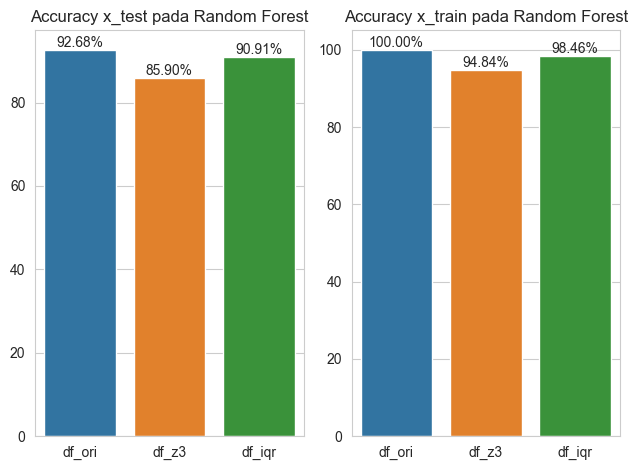

In [94]:
# Plot sederhana perbandingan Akurasi pada setiap Dataset

plt.subplot(1, 2, 1)
ax = sns.barplot(x=['df_ori', 'df_z3', 'df_iqr'], y=[score_x_test_ori, score_x_test_z3, score_x_test_iqr])
plt.title('Accuracy x_test pada Random Forest')
for i, v in enumerate([score_x_test_ori, score_x_test_z3, score_x_test_iqr]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')

plt.subplot(1, 2, 2)
ax = sns.barplot(x=['df_ori', 'df_z3', 'df_iqr'], y=[score_x_train_ori, score_x_train_z3, score_x_train_iqr])
plt.title('Accuracy x_train pada Random Forest')
for i, v in enumerate([score_x_train_ori, score_x_train_z3, score_x_train_iqr]):
    ax.text(i, v + 0.01, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout() 
plt.show()

Visualisasi diatas menggambarkan perbandingan akurasi pengujian data (x_test) dari tiga dataset yang berbeda (df_ori, df_z3 dan df_iqr) pada model Random Forest. Bisa dilihat bahwa dataset mengalami preprocessing dengan teknik Interquartile Range (IQR) menunjukkan skor paling tinggi kedua sebesar 90.91%, dibandingkan dengan kedua dataset lainnya, df_ori sebesar 92.68% dan df_z3 sebesar 85.90%. Dengan ini, menunjukkan bahwa teknik IQR dalam preprocessing dataset berperan signifikan terhadap peningkatan akurasi model Random Forest dalam memprediksi data pengujian terkait kasus gagal jantung.

# H. Evaluation Model

Di tahap Evaluasi Model, **Random Forest Classifier**  melibatkan berbagai metrik evaluasi yang mendalam, termasuk :

1. **Accuracy** : Metrik ini mengukur sejauh mana model mampu memprediksi kelas dengan benar secara keseluruhan, yaitu berapa persen prediksi yang benar dari total data.
2. **Precision** : Precision mengukur sejauh mana model mampu mengidentifikasi kelas positif dengan benar. Dalam konteks Logistic Regression, ini mengukur berapa persen prediksi positif yang benar dari semua prediksi positif.
3. **Recall** : Recall (atau Sensitivity) mengukur sejauh mana model mampu menemukan semua instance dari kelas positif yang sebenarnya. Ini mengukur berapa persen instance positif yang ditemukan dari total instance positif yang sebenarnya.
4. **F1-Score** : F1-Score adalah perpaduan dari Precision dan Recall. Ini adalah metrik yang baik untuk digunakan jika kami ingin mencapai keseimbangan antara Precision dan Recall.
5. **ROC (Receiver Operating Characteristic) Curve** : Merupakan grafik yang digunakan untuk mengukur kinerja model pada berbagai threshold pengklasifikasian. Ini membantu kami memahami trade-off antara True Positive Rate (Recall) dan False Positive Rate.
6. **Confusion Matrix** : Confusion Matrix adalah tabel yang menampilkan jumlah True Positive, True Negative, False Positive, dan False Negative. Ini memberikan gambaran yang lebih rinci tentang kinerja model.

Dengan memanfaatkan semua metrik ini, kami berharap dapat dapat melakukan evaluasi yang komprehensif terhadap model yang telah dikembangkan, memahami kemampuan model dalam memprediksi dan mengidentifikasi kelas-kelas target, serta menganalisis tingkat kesalahan dan akurasi model secara keseluruhan.

## H.1 Accuracy, Precision, Recall, F1-Score

### H.1.1 df_ori

In [95]:
y_pred = df_ori_RF_GSCV.predict(x_test_ori)
y_pred_train = df_ori_RF_GSCV.predict(x_train_ori)

f1 = f1_score(y_test_ori, y_pred)
recall = recall_score(y_test_ori, y_pred)
precision = precision_score(y_test_ori, y_pred)

accuracy = accuracy_score(y_test_ori, y_pred)
accuracy_train = accuracy_score(y_train_ori, y_pred_train)

print("F1-Score         : ", f1)
print('Recall           : ', recall)
print('Precision        : ', precision)
print('Accuracy  test   : ', accuracy)
print('Accuracy  train  : ', accuracy_train)

print()
print(classification_report(y_test_ori, y_pred))

F1-Score         :  0.923076923076923
Recall           :  0.972972972972973
Precision        :  0.8780487804878049
Accuracy  test   :  0.926829268292683
Accuracy  train  :  1.0

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        45
           1       0.88      0.97      0.92        37

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



### H.1.2 df_z3

In [96]:
y_pred = df_z3_RF_GSCV.predict(x_test_z3)
y_pred_train = df_z3_RF_GSCV.predict(x_train_z3)

f1 = f1_score(y_test_z3, y_pred)
recall = recall_score(y_test_z3, y_pred)
precision = precision_score(y_test_z3, y_pred)

accuracy = accuracy_score(y_test_z3, y_pred)
accuracy_train = accuracy_score(y_train_z3, y_pred_train)

print("F1-Score         : ", f1)
print('Recall           : ', recall)
print('Precision        : ', precision)
print('Accuracy  test   : ', accuracy)
print('Accuracy  train  : ', accuracy_train)

print()
print(classification_report(y_test_z3, y_pred))

F1-Score         :  0.8764044943820224
Recall           :  0.8478260869565217
Precision        :  0.9069767441860465
Accuracy  test   :  0.8589743589743589
Accuracy  train  :  0.9483870967741935

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.91      0.85      0.88        46

    accuracy                           0.86        78
   macro avg       0.85      0.86      0.86        78
weighted avg       0.86      0.86      0.86        78



### H.1.1 df_iqr

In [97]:
y_pred = df_iqr_RF_GSCV.predict(x_test_iqr)
y_pred_train = df_iqr_RF_GSCV.predict(x_train_iqr)

f1 = f1_score(y_test_iqr, y_pred)
recall = recall_score(y_test_iqr, y_pred)
precision = precision_score(y_test_iqr, y_pred)

accuracy = accuracy_score(y_test_iqr, y_pred)
accuracy_train = accuracy_score(y_train_iqr, y_pred_train)

print("F1-Score         : ", f1)
print('Recall           : ', recall)
print('Precision        : ', precision)
print('Accuracy  test   : ', accuracy)
print('Accuracy  train  : ', accuracy_train)

print()
print(classification_report(y_test_iqr, y_pred))

F1-Score         :  0.8999999999999999
Recall           :  0.9642857142857143
Precision        :  0.84375
Accuracy  test   :  0.9090909090909091
Accuracy  train  :  0.9846153846153847

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.84      0.96      0.90        28

    accuracy                           0.91        66
   macro avg       0.91      0.92      0.91        66
weighted avg       0.92      0.91      0.91        66



## H.2 ROC (Receiver Operating Characteristic) Curve

### H.2.1 df_ori

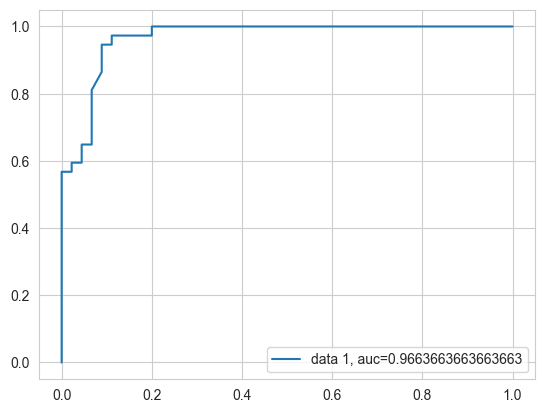

In [98]:
y_pred_proba = df_ori_RF_GSCV.predict_proba(x_test_ori)[::, 1]

fpr, tpr, _ = metrics.roc_curve(y_test_ori,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_ori, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Visualisasi kami lakukan pada ROC pada dataset df_ori. Model kami mendapat nilai **Area Under the Curve (AUC)** sebesar **0.966 dengan skala 0 sampai 1** yang berarti model kami memiliki kinerja baik dalam memisahkan kelas-kelas target. Gambar ROC tidak mulus atau terlihat kaku dikarenakan jumlah data yang sedikit.

### H.2.2 df_z3

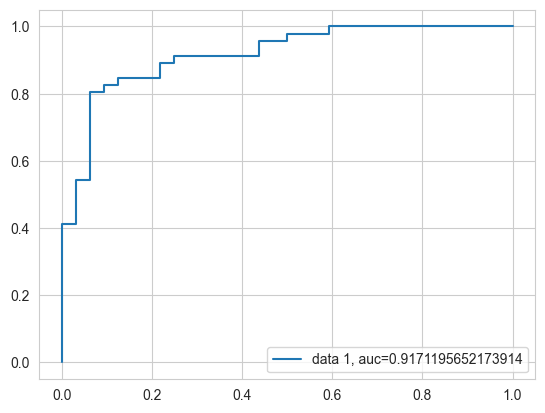

In [99]:
y_pred_proba = df_z3_RF_GSCV.predict_proba(x_test_z3)[::, 1]

fpr, tpr, _ = metrics.roc_curve(y_test_z3,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_z3, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Visualisasi kami lakukan pada ROC pada dataset df_z3. Model kami mendapat nilai **Area Under the Curve (AUC)** sebesar **0.917 dengan skala 0 sampai 1** yang berarti model kami memiliki kinerja baik dalam memisahkan kelas-kelas target. Gambar ROC tidak mulus atau terlihat kaku dikarenakan jumlah data yang sedikit.

### H.2.3 df_iqr

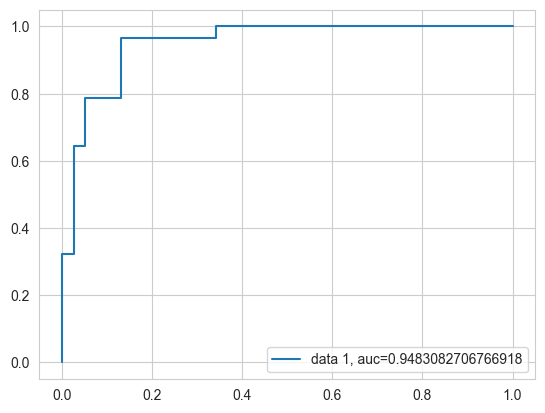

In [100]:
y_pred_proba = df_iqr_RF_GSCV.predict_proba(x_test_iqr)[::, 1]

fpr, tpr, _ = metrics.roc_curve(y_test_iqr,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_iqr, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Visualisasi kami lakukan pada ROC pada dataset df_iqr. Model kami mendapat nilai **Area Under the Curve (AUC)** sebesar **0.948 dengan skala 0 sampai 1** yang berarti model kami memiliki kinerja baik dalam memisahkan kelas-kelas target. Gambar ROC tidak mulus atau terlihat kaku dikarenakan jumlah data yang sedikit.

## H.3 Confusion Matrix

Visualisasi diatas merupakan Confusion Matrix yang digunakan untuk mengevaluasi kinerja model Random Forest Classifier. Dengan membandingkan hasil empat metrik:

1. **True Positive (TP)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa pasien berpotensi gagal jantung.
2. **True Negative (TN)** : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa pasien tidak berpotensi gagal jantung.
3. **False Positive (FP)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa pasien berpotensi gagal jantung.
4. **False Negative (FN)** : Ini adalah jumlah kasus di mana model salah memprediksi bahwa pasien tidak berpotensi gagal jantung padahal sebenarnya pasien memiliki potensi terkena gagal jantung.

Hal ini membantu kami dalam memahami sejauh mana model dapat mengklasifikasikan dengan benar dan salah, dan seberapa baik model dalam membedakan kelas positif dan negatif. Matriks dan nilai-nilai di setiap sel dan digambarkan dengan warna yang berbeda untuk memudahkan interpretasi.


### H.3.1 df_ori

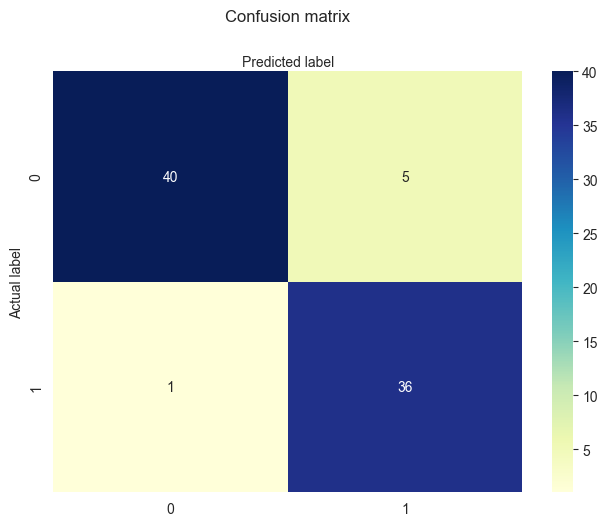

In [101]:
y_pred_ori = df_ori_RF_GSCV.predict(x_test_ori)

cnf_matrix = metrics.confusion_matrix(y_test_ori, y_pred_ori)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### H.3.2 df_z3

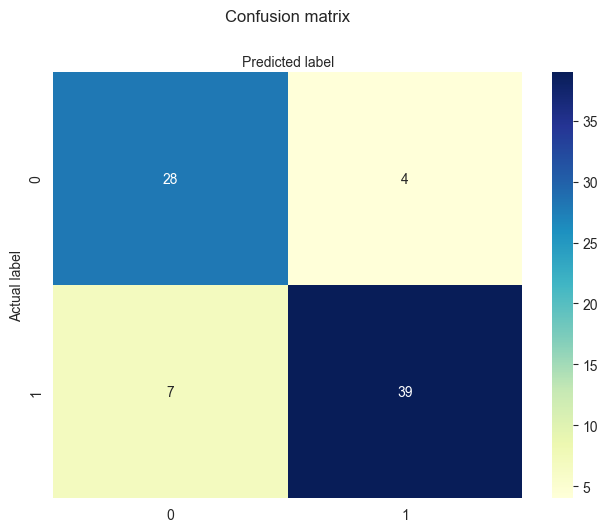

In [102]:
y_pred_z3 = df_z3_RF_GSCV.predict(x_test_z3)

cnf_matrix = metrics.confusion_matrix(y_test_z3, y_pred_z3)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### H.3.2 df_iqr

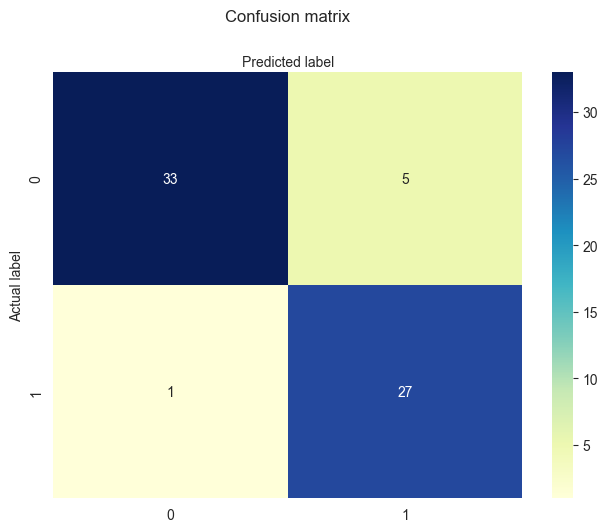

In [103]:
y_pred_iqr = df_iqr_RF_GSCV.predict(x_test_iqr)

cnf_matrix = metrics.confusion_matrix(y_test_iqr, y_pred_iqr)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Visualisasi diatas menggambarkan model dengan dataset df_ori cenderung lebih baik dibanding df_z3 dan df_iqr dalam mengidentifikasi kasus yang sebenarnya positif (TP) dan negatif (TN), namun ketiganya masih memiliki kecenderungan untuk salah mengklasifikasikan beberapa kasus sebagai positif palsu (FP) dan negatif palsu (FN). Dengan ini, bisa dilakukan penyesuaian mendalam terhadap model guna memperbaiki prediksinya terutama terkait dengan mengurangi kasus FP dan FN agar lebih mendekati hasil yang akurat.

# I. Model Inference

In [104]:
model_inference = {
    'age': [46,31,20,34],
    'anaemia': [1,1,1,0],
    'creatinine_phosphokinase': [130,21,146,123],
    'diabetes': [0,0,0,0],
    'ejection_fraction': [5,6,8,3],
    'high_blood_pressure': [0,0,0,1],
    'platelets': [166,61,54,71],
    'serum_creatinine': [18,24,1,16],
    'serum_sodium': [11,17,17,5],
    'sex': [1,1,1,1],
    'smoking': [0,1,1,0],
    'day': [31,32,32,0]
}

model_inference = pd.DataFrame(model_inference)
model_inference

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction   
0   46        1                       130         0                  5  \
1   31        1                        21         0                  6   
2   20        1                       146         0                  8   
3   34        0                       123         0                  3   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex   
0                    0        166                18            11    1  \
1                    0         61                24            17    1   
2                    0         54                 1            17    1   
3                    1         71                16             5    1   

   smoking  day  
0        0   31  
1        1   32  
2        1   32  
3        0    0

## I.1 Test dengan dataset buatan pada dataset df_z3

In [105]:
prediksi_z3 = df_z3_RF_GSCV.predict(model_inference)
prediksi_z3  # Death_Event yang seharusnya : 1,0,0,1

C:\Users\Ahmad Fadillah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 1], dtype=int64)

# J. Conclusion

Conclusion yang dapat kami capai mengenai project ensemble model ini yaitu :

- Melalui analisis proyek ini menggunakan dataset "heart_failure_clinical_records_dataset.csv" dengan 299 entitas dengan 13 atribut yang berpotensi memiliki risiko terkena gagal jantung. Semua atribut seperti usia, anemia, tekanan darah tinggi, dan faktor-faktor lainnya menjadi poin fokus dalam analisis.
- Lalu, kami melakukan analisis yang berfokus pada pembersihan dan persiapan data, penggunaan teknik ensemble model, terutama model Random Forest, dan evaluasi kinerja model. Kami mengevaluasi model dengan metrik seperti akurasi, presisi, recall, F1-Score, serta melalui visualisasi kurva ROC serta confusion matrix yang menggambarkan kemampuan model dalam membedakan antara pasien yang berpotensi terkena gagal jantung dan tidak.
- Dan tahap pengujian model memiliki hasil diantaranya :
    1. Ensemble model Random Forest dapat memprediksi risiko gagal jantung dengan akurasi yang baik. Model ini memiliki performa yang kuat dalam mengidentifikasi pasien yang berpotensi mengalami gagal jantung dengan akurasi yang konsisten pada berbagai dataset yang telah diproses.
    2. Namun, interpretasi masih harus dilakukan secara hati-hati dengan pertimbangan lebih lanjut untuk menerapkannya dalam pengambilan keputusan klinis yang sebenarnya.

Proyek ini memberikan pemahaman penting terkait risiko terkena gagal jantung dan bagaimana pendekatan machine learning dapat digunakan untuk mendukung deteksi dini serta penanganan yang lebih tepat terhadap kasus-kasus potensial terkena penyakit yang serius ini. Dengan memanfaatkan informasi dari dataset klinis, dapat memberikan manfaat yang lebih baik dalam pengelolaan layanan kesehatan dan pengambilan keputusan yang lebih akurat dalam konteks medis.

# K. Pickle

## K.1 Pickle model dataset df_iqr

In [106]:
filename = 'RandomForest-df_iqr.sav'

# Simpan model ke dalam file pickle
with open(filename, 'wb') as file:
    pickle.dump(df_iqr_RF_GSCV, file)